In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('/content/predictive_maintenance.csv')

In [4]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [6]:
dataset['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [7]:
dataset.describe().transpose()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dataset['Type'] = label_encoder.fit_transform(dataset['Type'])
dataset['Failure Type'] = label_encoder.fit_transform(dataset['Failure Type'])

In [11]:
dataset.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['Air temperature [K]', 'Process temperature [k]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(
    dataset[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
)

In [13]:
print(dataset['Target'].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


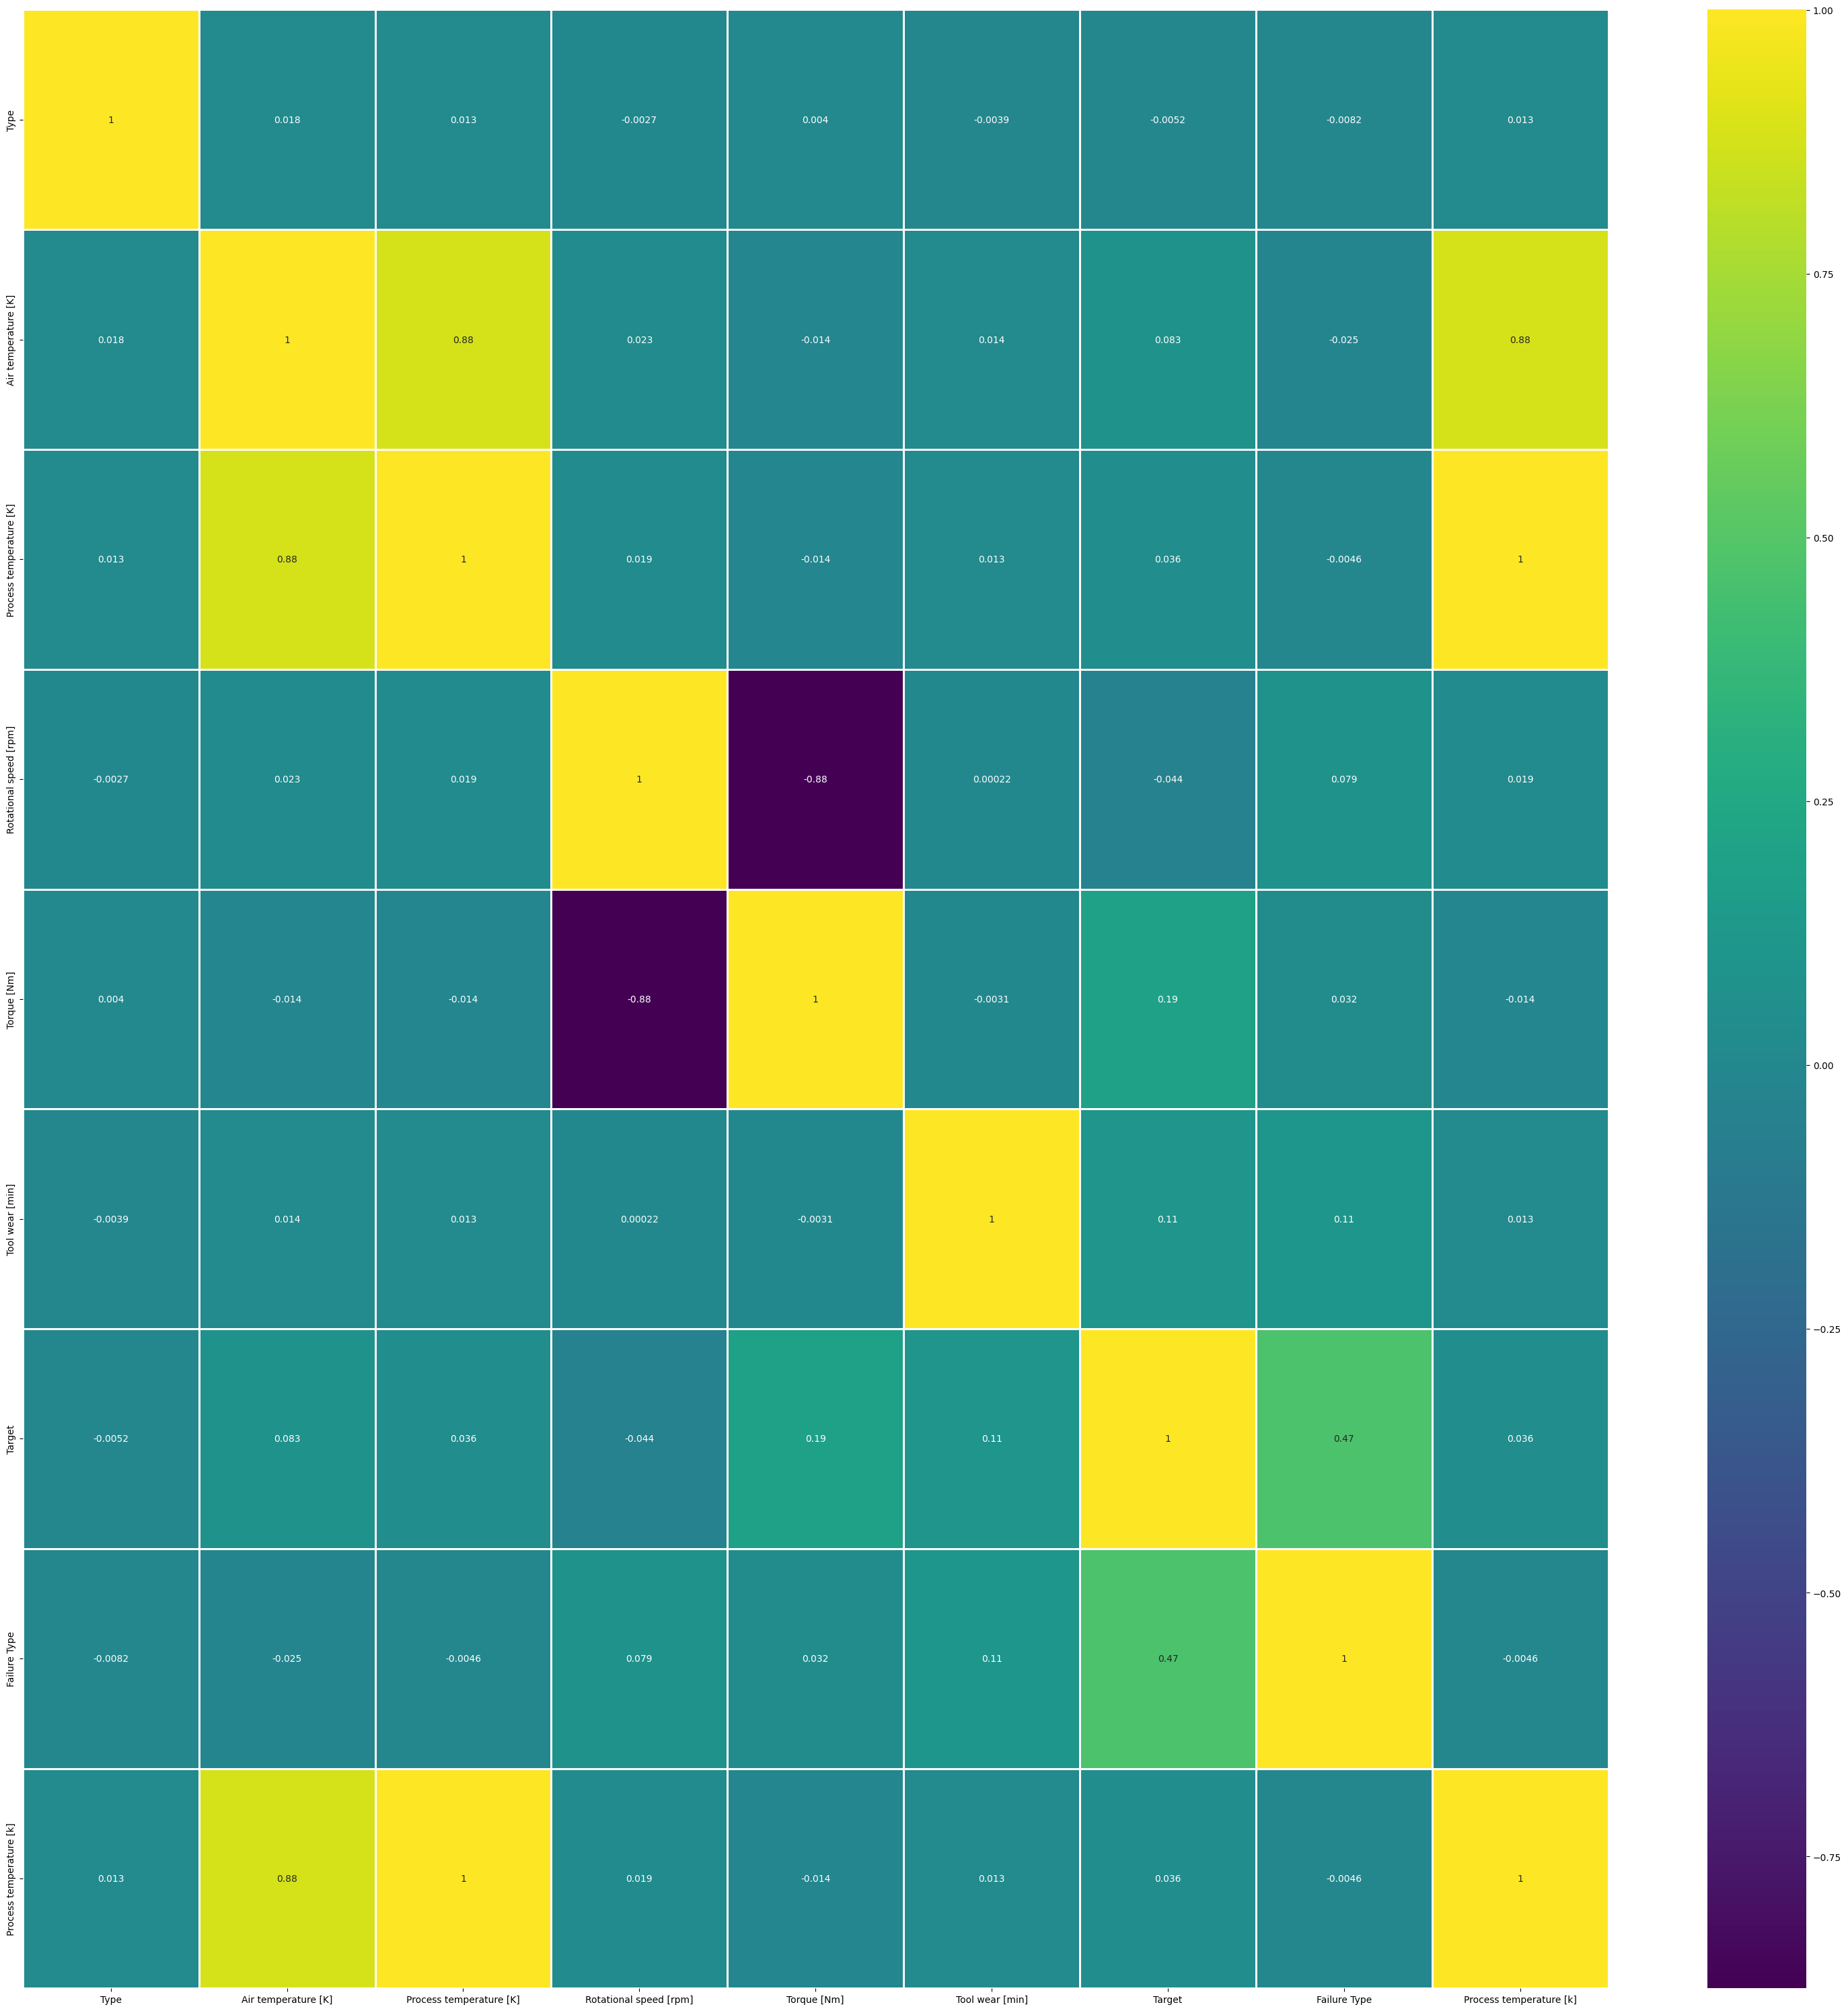

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True, linewidths=2, cmap='viridis')
plt.tight_layout()

In [ ]:
corr.sort_index(ascending=True)

Type  Air temperature [K]  \
Air temperature [K]      0.017599             1.000000   
Failure Type            -0.008249            -0.025327   
Process temperature [K]  0.013444             0.876107   
Process temperature [k]  0.013444             0.876107   
Rotational speed [rpm]  -0.002693             0.022670   
Target                  -0.005152             0.082556   
Tool wear [min]         -0.003930             0.013853   
Torque [Nm]              0.004011            -0.013778   
Type                     1.000000             0.017599   

                         Process temperature [K]  Rotational speed [rpm]  \
Air temperature [K]                     0.876107                0.022670   
Failure Type                           -0.004600                0.079407   
Process temperature [K]                 1.000000                0.019277   
Process temperature [k]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Target                                  0.035946               -0.044188   
Tool wear [min]                         0.013488                0.000223   
Torque [Nm]                            -0.014061               -0.875027   
Type                                    0.013444               -0.002693   

                         Torque [Nm]  Tool wear [min]    Target  Failure Type  \
Air temperature [K]        -0.013778         0.013853  0.082556     -0.025327   
Failure Type                0.031737         0.111619  0.470541      1.000000   
Process temperature [K]    -0.014061         0.013488  0.035946     -0.004600   
Process temperature [k]    -0.014061         0.013488  0.035946     -0.004600   
Rotational speed [rpm]     -0.875027         0.000223 -0.044188      0.079407   
Target                      0.191321         0.105448  1.000000      0.470541   
Tool wear [min]            -0.003093         1.000000  0.105448      0.111619   
Torque [Nm]                 1.000000        -0.003093  0.191321      0.031737   
Type                        0.004011        -0.003930 -0.005152     -0.008249   

                         Process temperature [k]  
Air temperature [K]                     0.876107  
Failure Type                           -0.004600  
Process temperature [K]                 1.000000  
Process temperature [k]                 1.000000  
Rotational speed [rpm]                  0.019277  
Target                                  0.035946  
Tool wear [min]                         0.013488  
Torque [Nm]                            -0.014061  
Type                                    0.013444

## Data Visualization

---



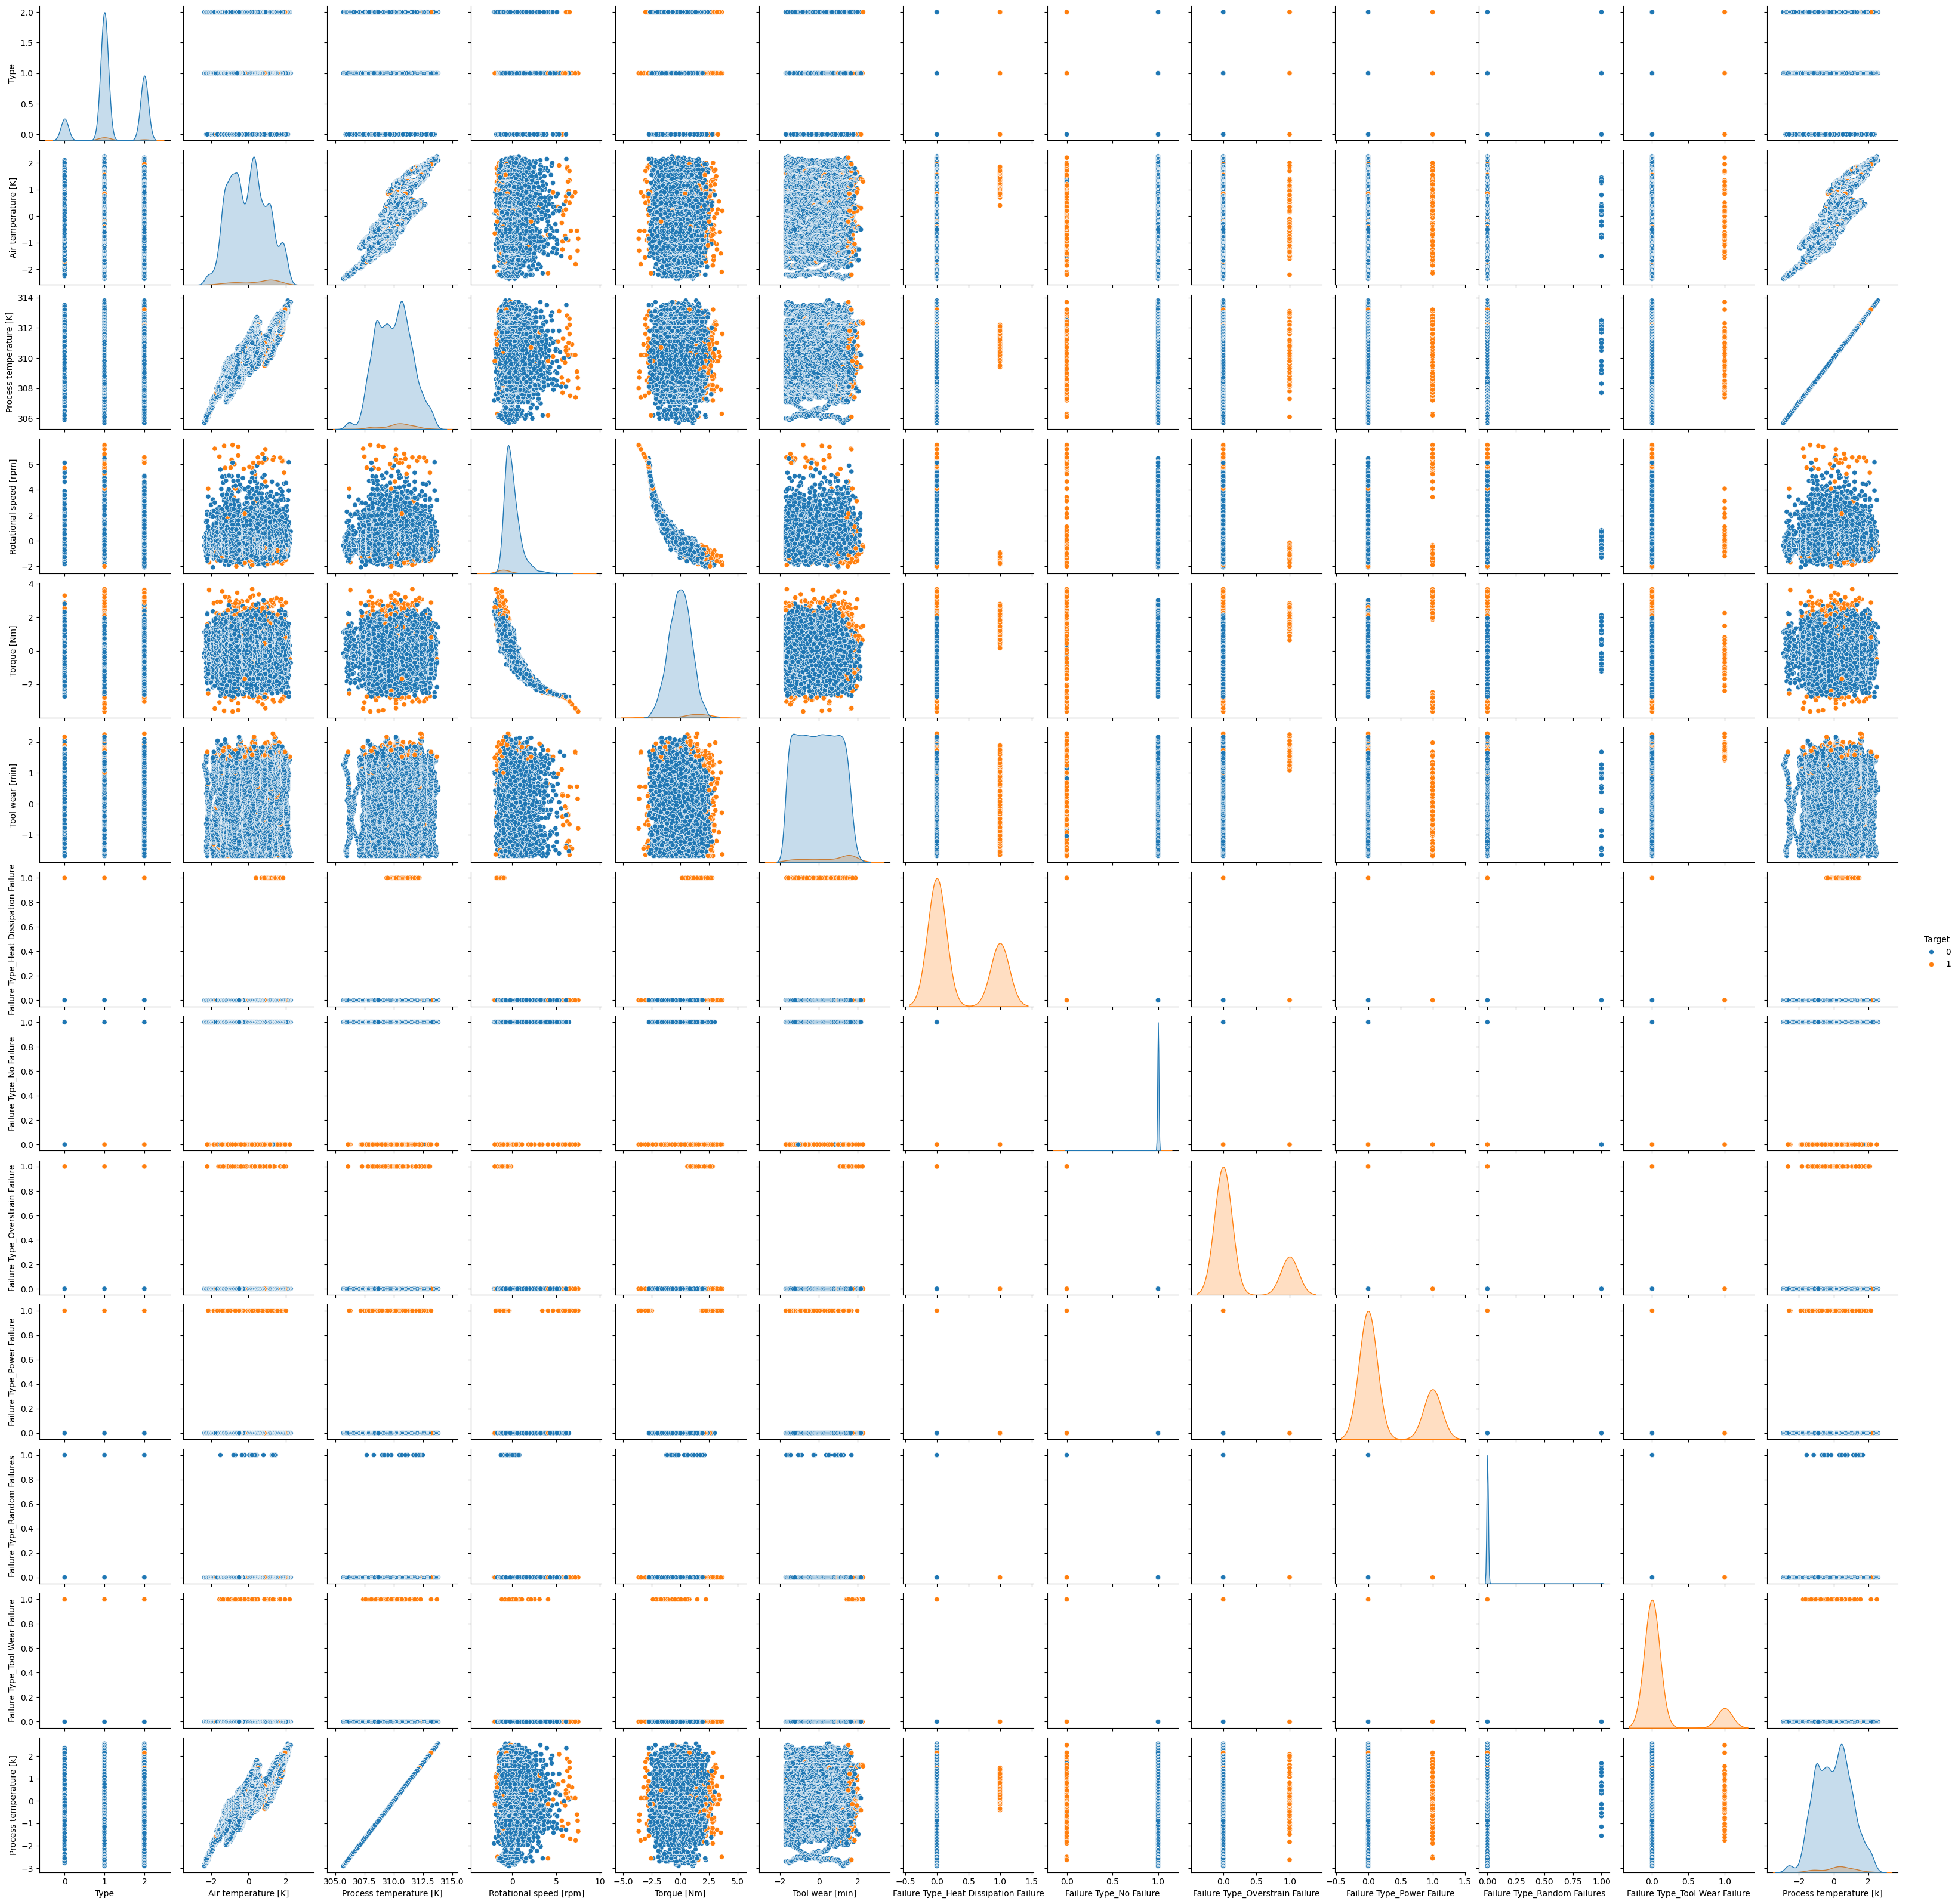

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset, hue="Target", diag_kind="kde")
plt.show()

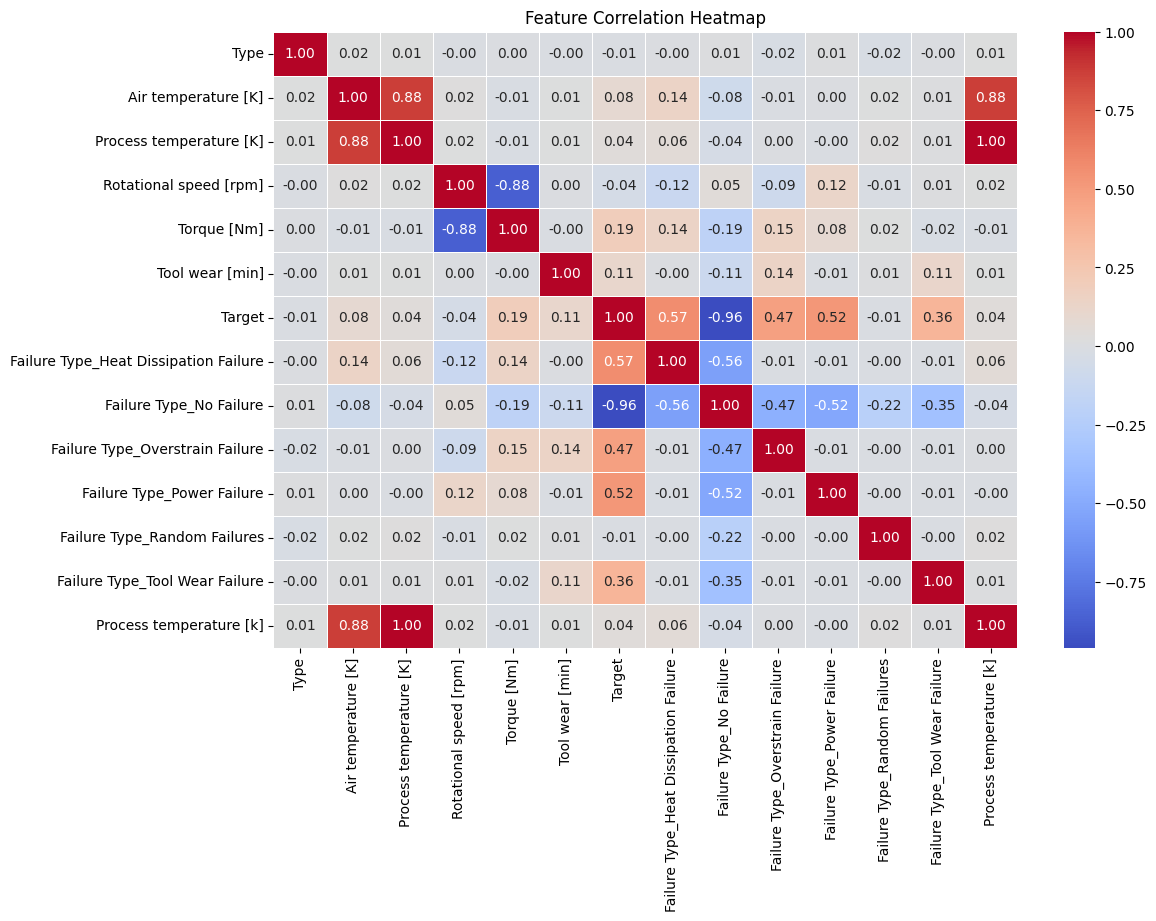

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

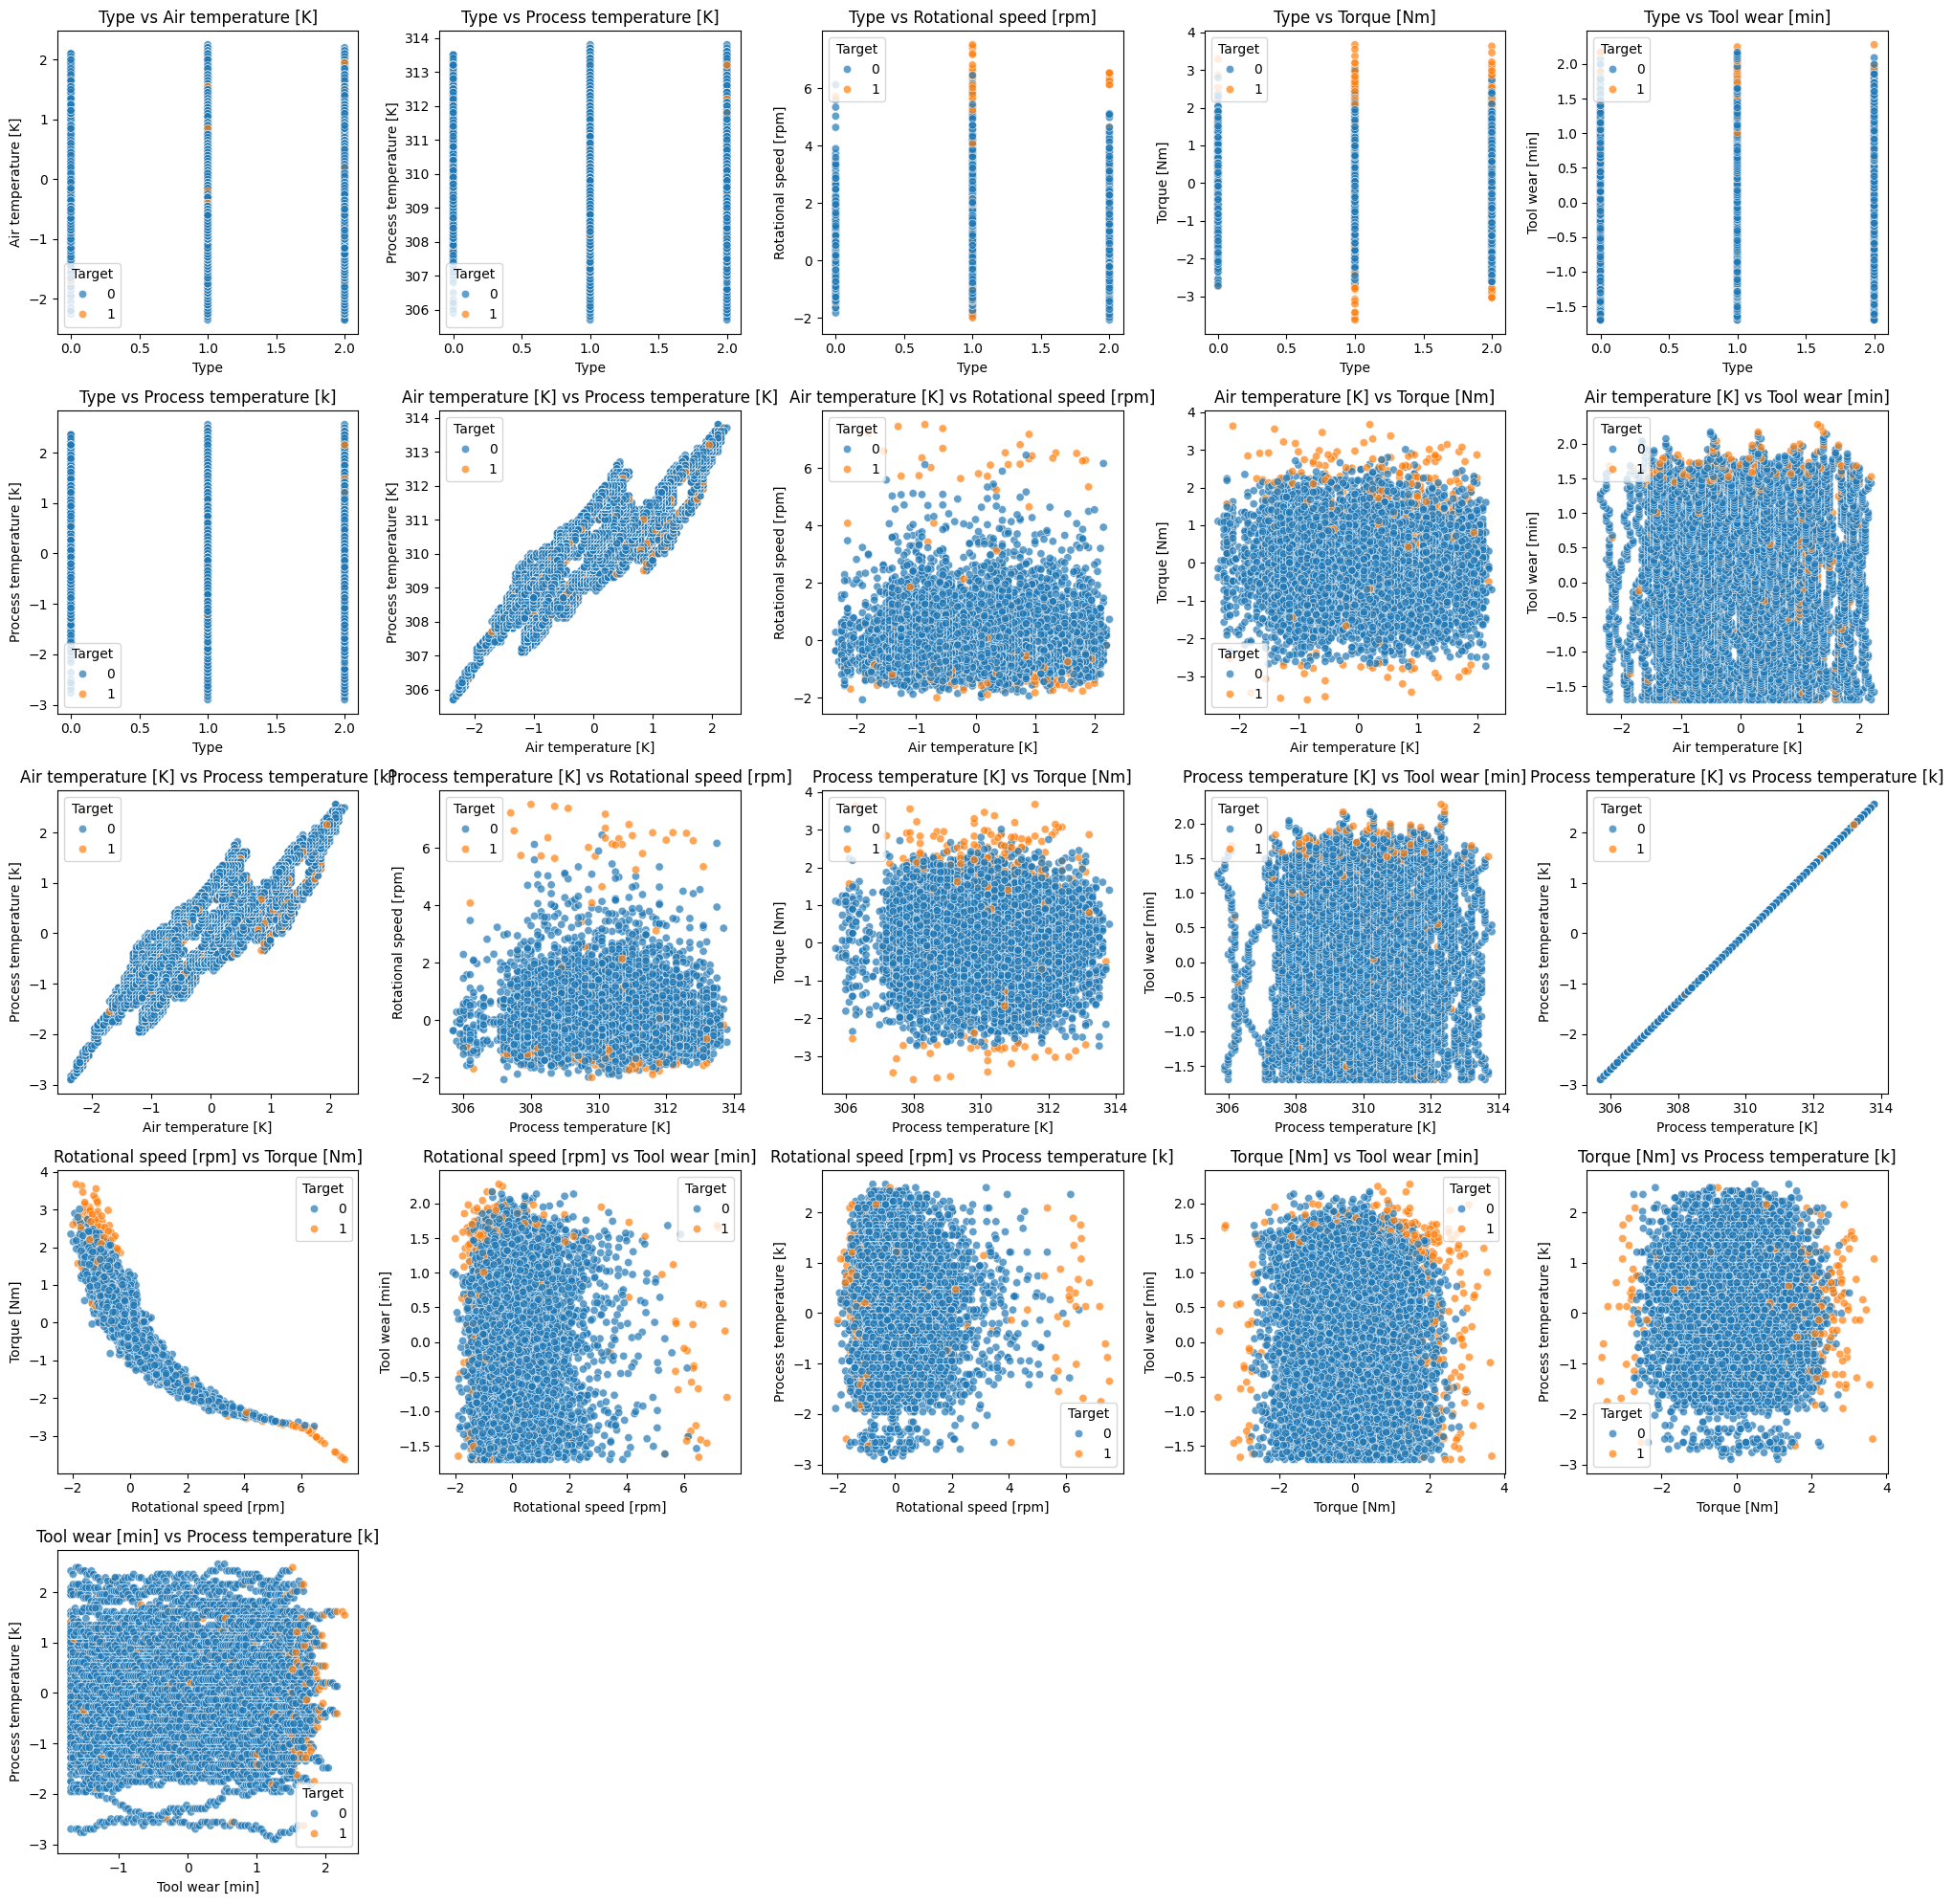

In [ ]:
import itertools

dataset['Target'] = dataset['Target'].astype(str)

num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 20))
for i, (col1, col2) in enumerate(itertools.combinations(num_cols, 2), 1):
    plt.subplot(5, 5, i)
    sns.scatterplot(data=dataset, x=col1, y=col2, hue="Target", alpha=0.7)
    plt.title(f"{col1} vs {col2}")

plt.tight_layout()
plt.show()



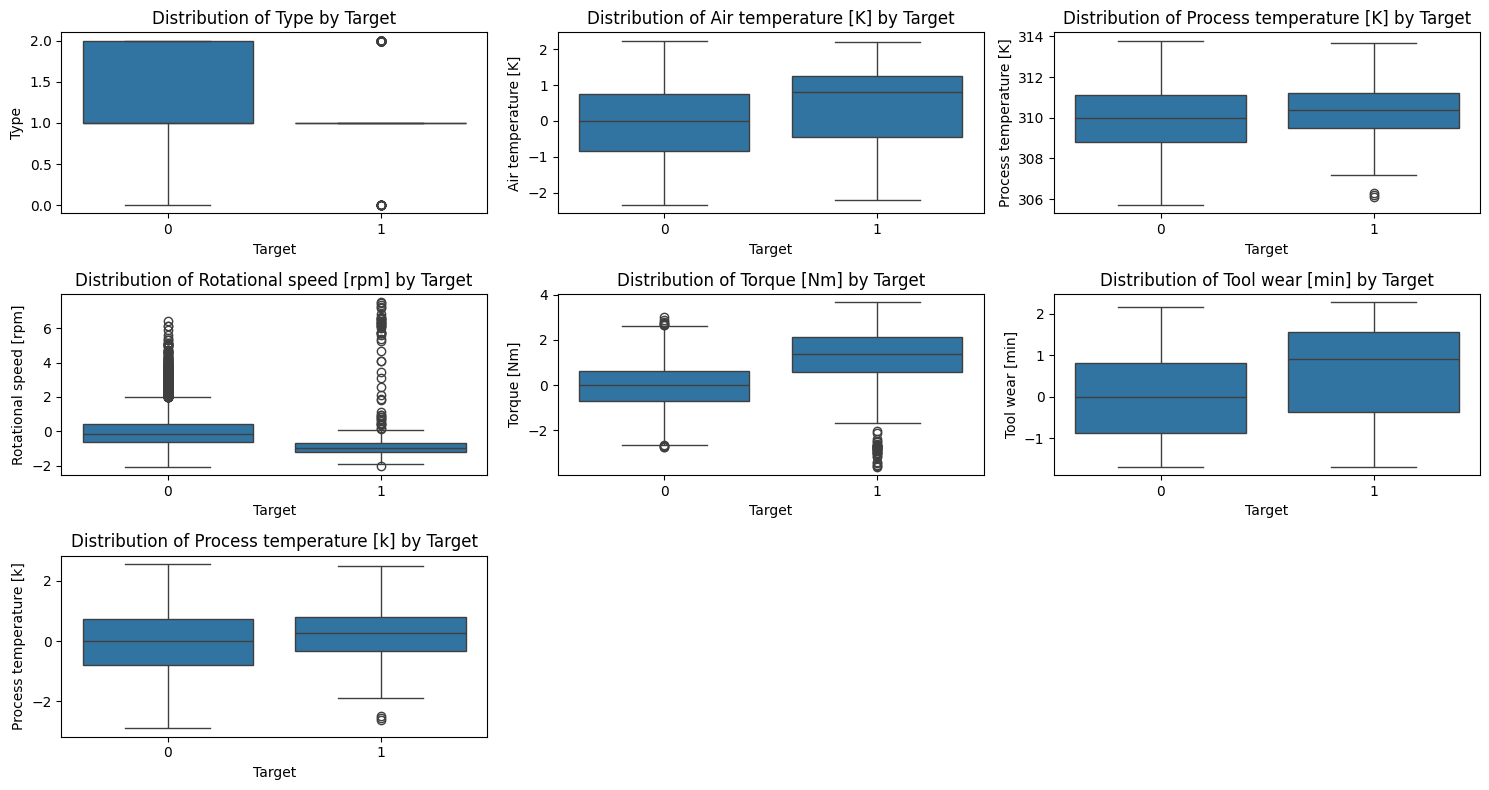

In [ ]:
dataset.columns = dataset.columns.str.strip()
dataset['Target']=dataset['Target'].astype(str)

plt.figure(figsize=(15,8))
for i, col in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=dataset, x= "Target", y=col)
    plt.title(f"Distribution of {col} by Target")

plt.tight_layout()
plt.show()

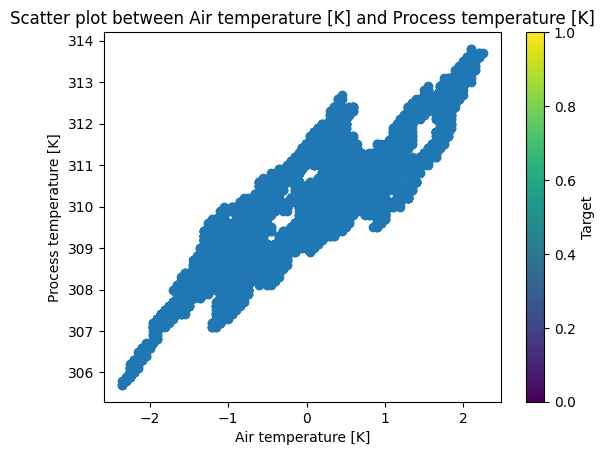

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Process temperature [K]'])
plt.title('Scatter plot between Air temperature [K] and Process temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.colorbar(label='Target')
plt.show()

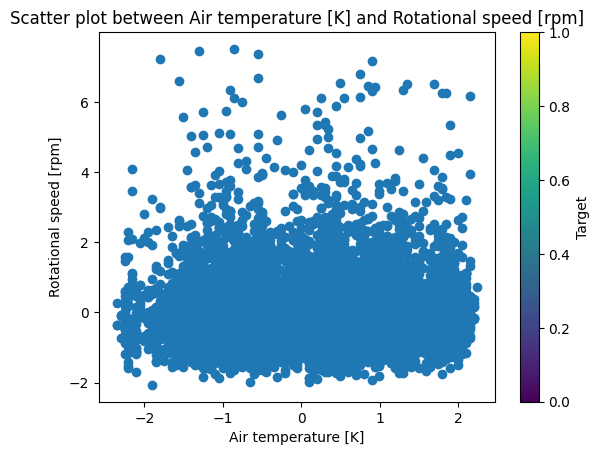

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Air temperature [K] and Rotational speed [rpm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

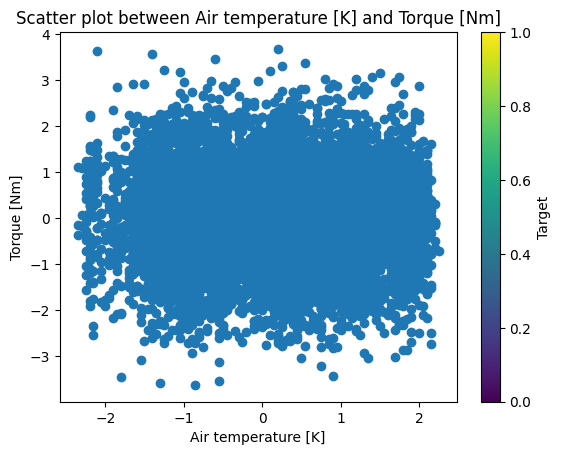

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Air temperature [K] and Torque [Nm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

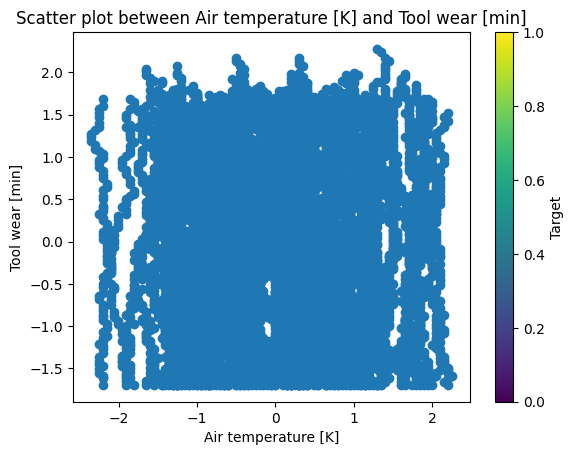

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Air temperature [K] and Tool wear [min]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

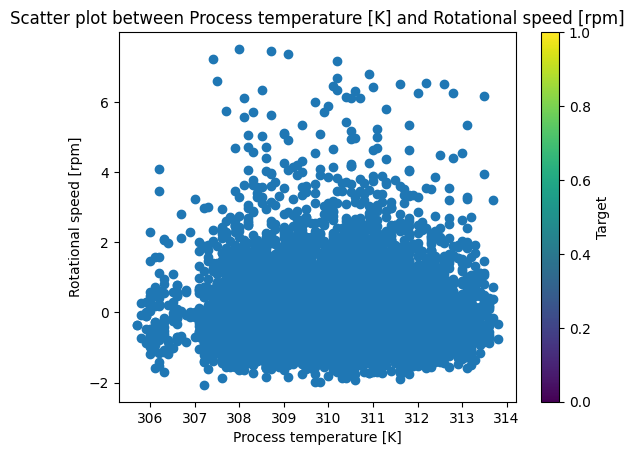

In [ ]:
plt.scatter(dataset['Process temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Process temperature [K] and Rotational speed [rpm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

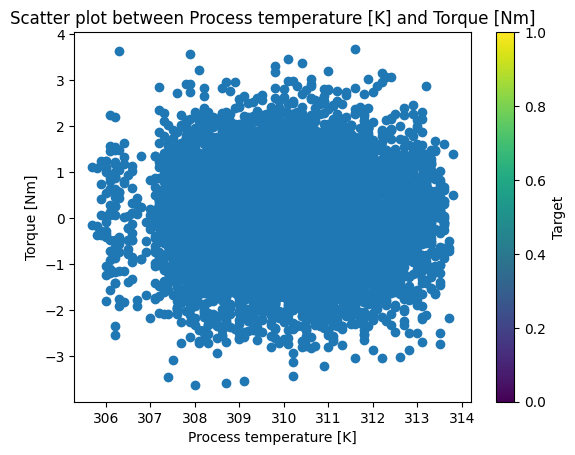

In [ ]:
plt.scatter(dataset['Process temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Process temperature [K] and Torque [Nm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

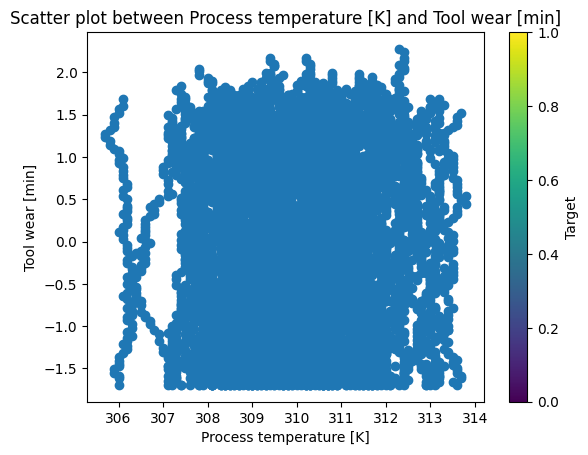

In [ ]:
plt.scatter(dataset['Process temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Process temperature [K] and Tool wear [min]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

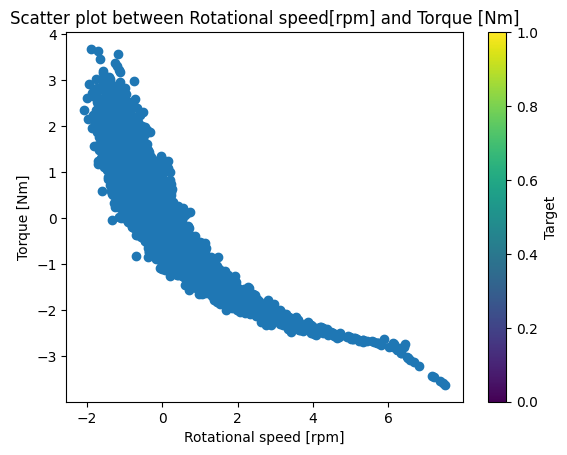

In [ ]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Rotational speed[rpm] and Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

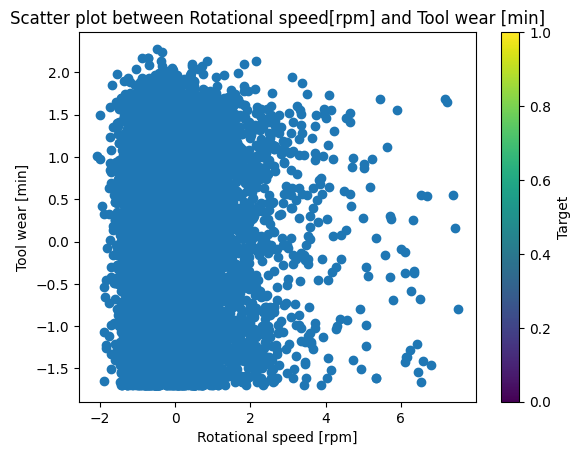

In [ ]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Rotational speed[rpm] and Tool wear [min]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

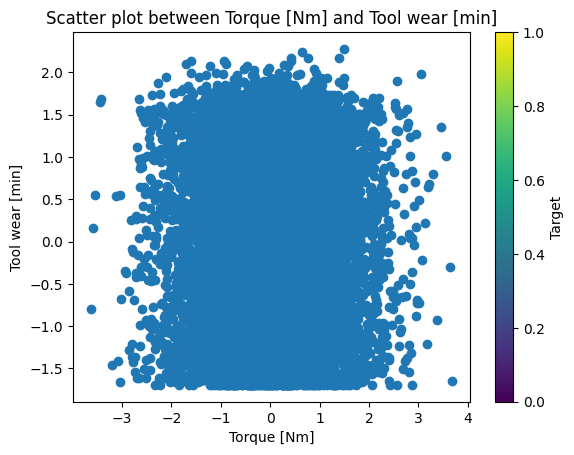

In [ ]:
plt.scatter(dataset['Torque [Nm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Torque [Nm] and Tool wear [min]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

<Axes: xlabel='Target'>

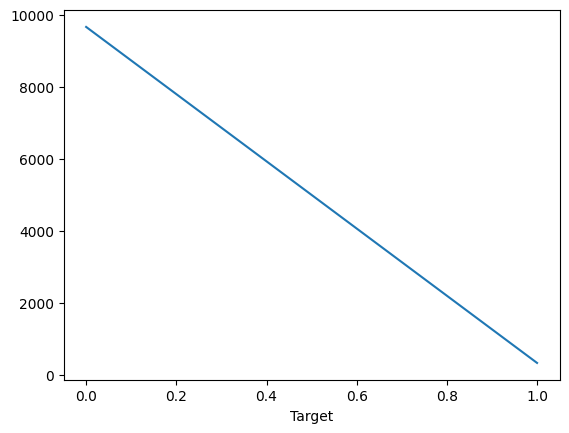

In [ ]:
dataset['Target'].value_counts().plot()

<ipython-input-15-00bfe1aaf141>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Target'], palette='bright')


<Axes: xlabel='Target', ylabel='count'>

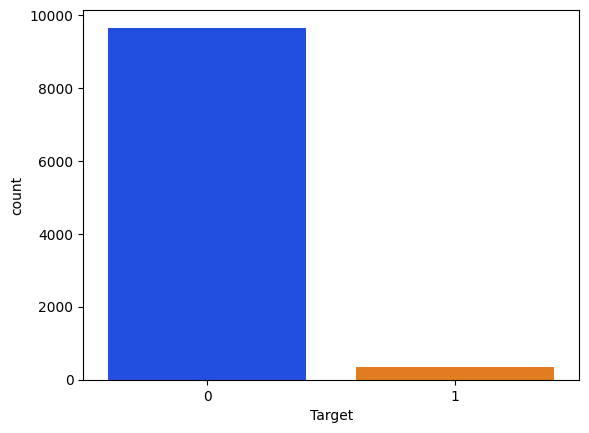

In [ ]:
sns.countplot(x=dataset['Target'], palette='bright')

## Feature Selection

---



In [14]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                    308.6                0.068185   
1     1            -0.902393                    308.7               -0.729472   
2     1            -0.952389                    308.5               -0.227450   
3     1            -0.902393                    308.6               -0.590021   
4     1            -0.902393                    308.7               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  Process temperature [k]  
0     0.282200        -1.695984       0             1                -0.947360  
1     0.633308        -1.648852       0             1                -0.879959  
2     0.944290        -1.617430       0             1                -1.014761  
3    -0.048845        -1.586009       0             1                -0.947360  
4     0.001313        -1.554588       0             1                -0.879959

In [15]:
dataset.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'Process temperature [k]'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Failure Type'] = encoder.fit_transform(dataset['Failure Type'])

print(dataset['Failure Type'].value_counts())

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


In [17]:
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

In [18]:
correlation_with_target = numeric_df.corr()['Target'].sort_values(ascending=False)

In [19]:
print(correlation_with_target)

Target                     1.000000
Failure Type               0.470541
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [k]    0.035946
Process temperature [K]    0.035946
Type                      -0.005152
Rotational speed [rpm]    -0.044188
Name: Target, dtype: float64


<ipython-input-20-ea8212cc1b30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


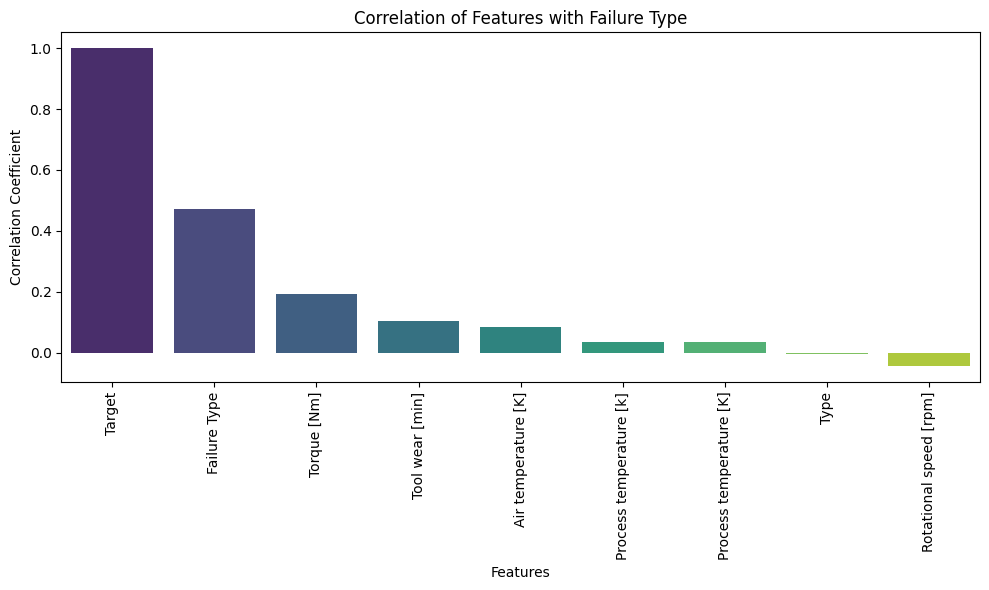

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f"Correlation of Features with Failure Type")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [21]:
columns_to_drop = ['Type','Failure Type']

In [22]:
dataset = dataset.drop(columns=columns_to_drop)

In [23]:
dataset.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.952389                    308.6                0.068185   
1            -0.902393                    308.7               -0.729472   
2            -0.952389                    308.5               -0.227450   
3            -0.902393                    308.6               -0.590021   
4            -0.902393                    308.7               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Process temperature [k]  
0     0.282200        -1.695984       0                -0.947360  
1     0.633308        -1.648852       0                -0.879959  
2     0.944290        -1.617430       0                -1.014761  
3    -0.048845        -1.586009       0                -0.947360  
4     0.001313        -1.554588       0                -0.879959

In [24]:
columns_to_drop = ['Process temperature [K]']
data = dataset.drop(columns=columns_to_drop)

In [25]:
data.columns

Index(['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Process temperature [k]'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Rotational speed [rpm]   10000 non-null  float64
 2   Torque [Nm]              10000 non-null  float64
 3   Tool wear [min]          10000 non-null  float64
 4   Target                   10000 non-null  int64  
 5   Process temperature [k]  10000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


## Data Normalization

---



In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X=data.drop('Target', axis=1)
y=data['Target']

In [29]:
scaler=StandardScaler()

In [30]:
X_scaled=scaler.fit_transform(X)

In [31]:
X_scaled

array([[-0.95238944,  0.06818514,  0.28219976, -1.69598374, -0.94735989],
       [-0.90239341, -0.72947151,  0.63330802, -1.6488517 , -0.879959  ],
       [-0.95238944, -0.22744984,  0.94428963, -1.61743034, -1.01476077],
       ...,
       [-0.50242514,  0.59251888, -0.66077672, -1.35034876, -0.94735989],
       [-0.50242514, -0.72947151,  0.85400464, -1.30321671, -0.879959  ],
       [-0.50242514, -0.2162938 ,  0.02137647, -1.22466331, -0.879959  ]])

In [32]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

# Model Train "Target" as a Target Column

## Train Test Split

---



In [33]:
from sklearn.model_selection import train_test_split

In [34]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

## Implement Ensemble Models

---



In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [52]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_multiclass(y_true, y_pred, y_proba):
    # Ensure y_true is 1D
    if y_true.ndim > 1:
        y_true = y_true.argmax(axis=1)  # Convert binarized labels back to 1D if needed
        print("Converted y_true to 1D with shape:", y_true.shape)

    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True)

    # Calculate ROC AUC
    num_classes = len(set(y_true))
    if num_classes == 2:
        # Binary classification: use positive class probabilities
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    else:
        # Multi-class: use one-vs-rest
        roc_auc = roc_auc_score(y_true, y_proba, multi_class="ovr")

    # Compile metrics
    metrics = {
        "Accuracy": report['accuracy'],
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1 Score (Macro)": report['macro avg']['f1-score'],
        "ROC AUC Score": roc_auc
    }
    return metrics

### Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Decision Tree

In [39]:
tree_model = DecisionTreeClassifier(random_state=42)

In [40]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
tree_pred_prob = tree_model.predict(X_test)

In [42]:
print(classification_report(y_test,tree_pred_prob))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.64      0.67      0.65       102

    accuracy                           0.98      3000
   macro avg       0.81      0.83      0.82      3000
weighted avg       0.98      0.98      0.98      3000



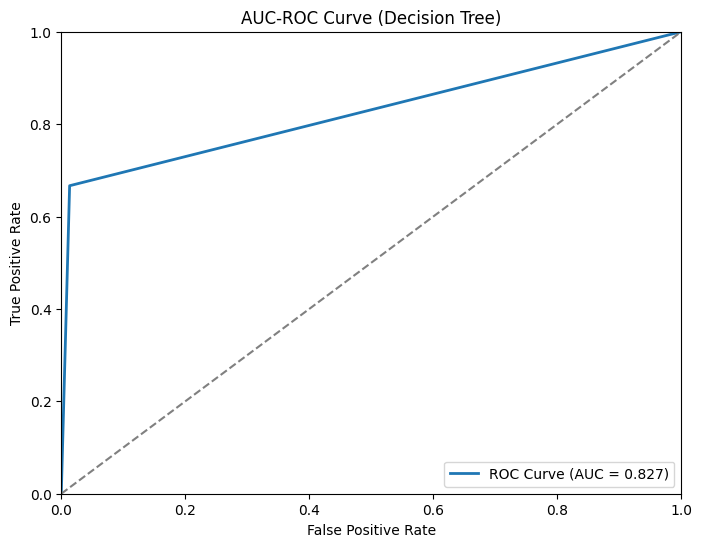

In [50]:
fpr, tpr, _ = roc_curve(y_test_bin, tree_pred_prob[:, 1])  # Use positive class probabilities
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

Decision Tree with Bagging

In [44]:
tree_bagging = BaggingClassifier(estimator=tree_model, n_estimators=10, random_state=42)

In [45]:
tree_bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [46]:
tree_bagging_pred = tree_bagging.predict(X_test)

In [47]:
print(classification_report(y_test, tree_bagging_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.80      0.58      0.67       102

    accuracy                           0.98      3000
   macro avg       0.89      0.79      0.83      3000
weighted avg       0.98      0.98      0.98      3000



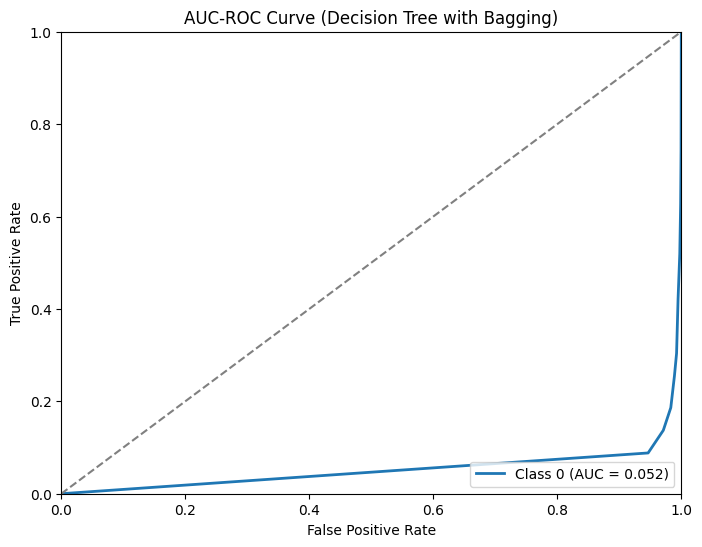

In [48]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs = tree_bagging.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Decision Tree with Bagging)')
plt.legend(loc='lower right')
plt.show()

In [53]:
metrics = evaluate_multiclass(y_test, tree_bagging_pred, y_probs)
print(metrics)

{'Accuracy': 0.9806666666666667, 'Precision (Macro)': 0.8913007334059966, 'Recall (Macro)': 0.7866276945560833, 'F1 Score (Macro)': 0.8302478771228772, 'ROC AUC Score': np.float64(0.9475263535365837)}


<Axes: >

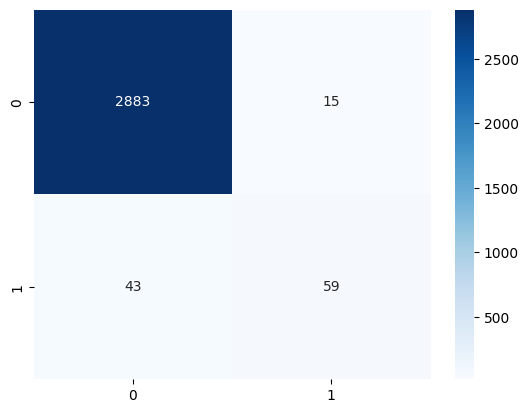

In [54]:
cm = confusion_matrix(y_test, tree_bagging_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Grid Search CV

In [55]:
param_grid = {
    'n_estimators': [10,50,100],
    'estimator__max_depth': [5,10,20],
    'estimator__min_samples_split': [2,5,10],
    'estimator__min_samples_leaf': [1,2,4]
}

In [56]:
grid_search = GridSearchCV(tree_bagging,param_grid,scoring='f1_weighted', cv=3,n_jobs=-1)

In [58]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [5, 10, 20],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='f1_weighted')

In [59]:
best_model = grid_search.best_estimator_

In [60]:
tree_bagging_pred_cv = best_model.predict(X_test)

In [61]:
print(classification_report(y_test,tree_bagging_pred_cv))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2898
           1       0.84      0.66      0.74       102

    accuracy                           0.98      3000
   macro avg       0.91      0.83      0.86      3000
weighted avg       0.98      0.98      0.98      3000



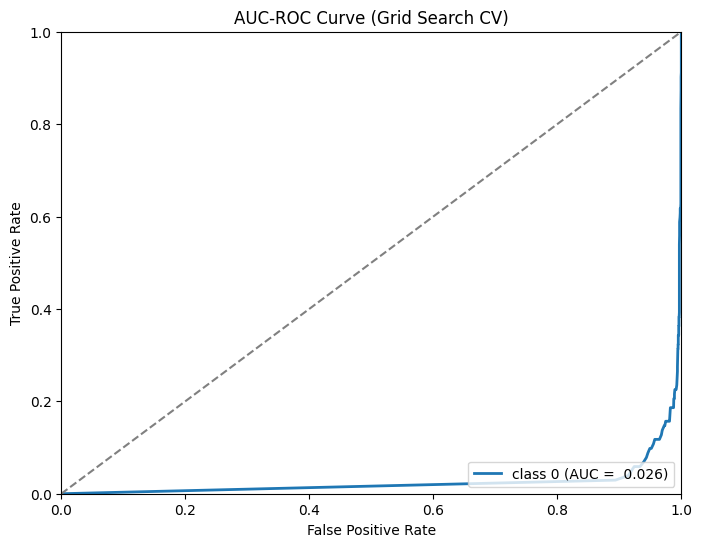

In [62]:
y_test_bin = label_binarize(y_test,classes=grid_search.best_estimator_.classes_)

y_probs = grid_search.best_estimator_.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):
  fpr,tpr, _ = roc_curve(y_test_bin[:,i],y_probs[:,i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr,lw=2, label=f'class {i} (AUC = {roc_auc: .3f})')

plt.plot([0,1],[0,1], color='gray', linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Grid Search CV)')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [63]:
forest_model = RandomForestClassifier(random_state=42)

In [64]:
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [65]:
forest_pred = forest_model.predict(X_test)

In [66]:
print(classification_report(y_test, forest_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2898
           1       0.86      0.65      0.74       102

    accuracy                           0.98      3000
   macro avg       0.92      0.82      0.86      3000
weighted avg       0.98      0.98      0.98      3000



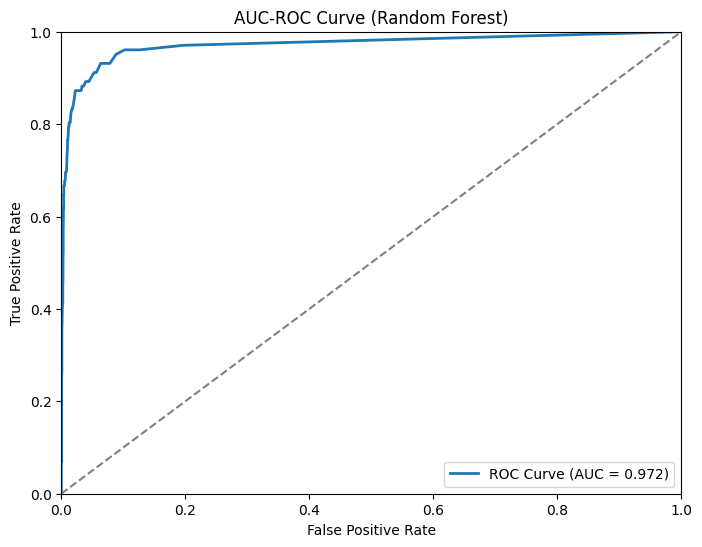

In [72]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = forest_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

Random Forest with Bagging

In [73]:
forest_bagging = BaggingClassifier(estimator=forest_model,n_estimators=10,random_state=42)

In [74]:
forest_bagging.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [75]:
forest_bagging_pred = forest_bagging.predict(X_test)

In [76]:
print(classification_report(y_test,forest_bagging_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.85      0.51      0.64       102

    accuracy                           0.98      3000
   macro avg       0.92      0.75      0.81      3000
weighted avg       0.98      0.98      0.98      3000



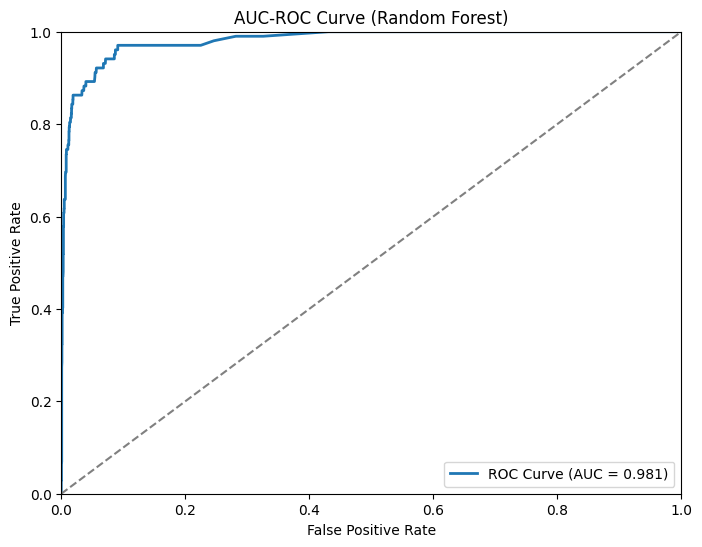

In [77]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = forest_bagging.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [78]:
metrics = evaluate_multiclass(y_test, forest_bagging_pred, y_probs)
print(metrics)

{'Accuracy': 0.9803333333333333, 'Precision (Macro)': 0.9177232135386744, 'Recall (Macro)': 0.7533491657532578, 'F1 Score (Macro)': 0.8139644388295104, 'ROC AUC Score': np.float64(0.9811617883868522)}


<Axes: >

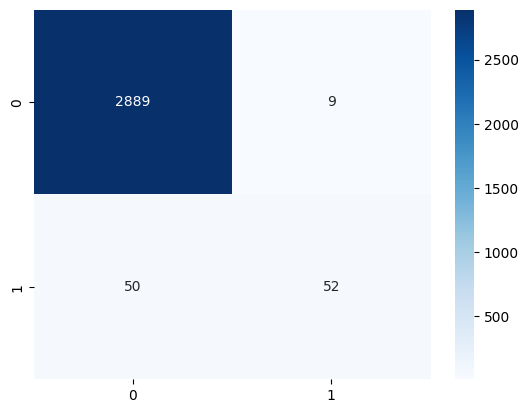

In [79]:
cm = confusion_matrix(y_test, forest_bagging_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Hyperparameter Tuning for Random Forest

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2']
}

In [82]:
forest_model = RandomForestClassifier(random_state=42)

In [83]:
Random_search = RandomizedSearchCV(
    estimator=forest_model,param_distributions = param_grid,
    n_iter=10, cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [84]:
Random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1_weighted')

In [85]:
best_params = Random_search.best_params_

In [86]:
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


In [87]:
forest_model_best = RandomForestClassifier(**best_params, random_state=42)

In [88]:
forest_bagging = BaggingClassifier(estimator=forest_model_best, n_estimators=10, random_state=42)

In [89]:
forest_bagging.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                   max_features='log2',
                                                   n_estimators=200,
                                                   random_state=42),
                  random_state=42)

In [90]:
forest_bagging_pred = forest_bagging.predict(X_test)

In [91]:
print(classification_report(y_test, forest_bagging_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.84      0.42      0.56       102

    accuracy                           0.98      3000
   macro avg       0.91      0.71      0.78      3000
weighted avg       0.98      0.98      0.97      3000



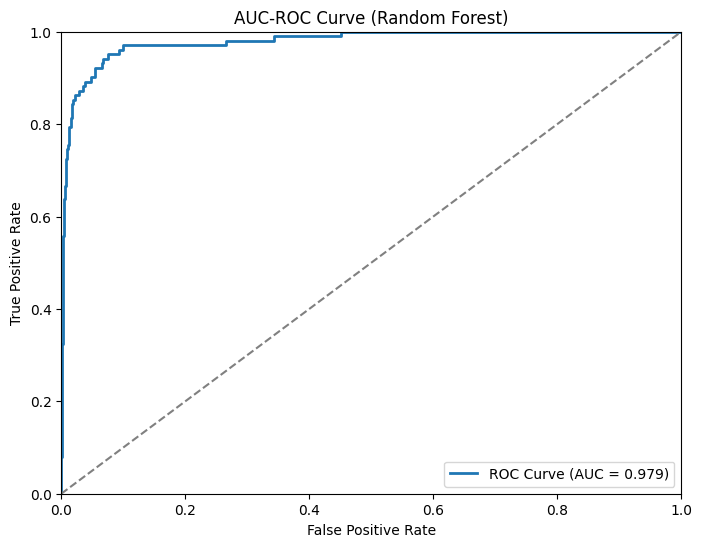

In [92]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = forest_bagging.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

## Boosting

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.multiclass import OneVsRestClassifier

In [94]:
model = AdaBoostClassifier(n_estimators=10, learning_rate=1)

In [95]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10)

In [96]:
y_pred_adaboost = model.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred_adaboost,zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2898
           1       0.57      0.13      0.21       102

    accuracy                           0.97      3000
   macro avg       0.77      0.56      0.60      3000
weighted avg       0.96      0.97      0.96      3000



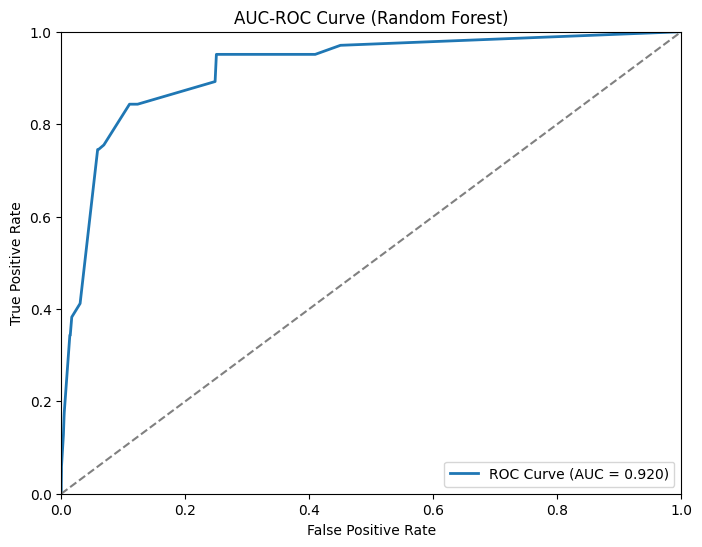

In [98]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [99]:
metrics = evaluate_multiclass(y_test, y_pred_adaboost, y_probs)
print(metrics)

{'Accuracy': 0.967, 'Precision (Macro)': 0.767660761490266, 'Recall (Macro)': 0.562000162383794, 'F1 Score (Macro)': 0.5955744680851064, 'ROC AUC Score': np.float64(0.9199278745314551)}


<Axes: >

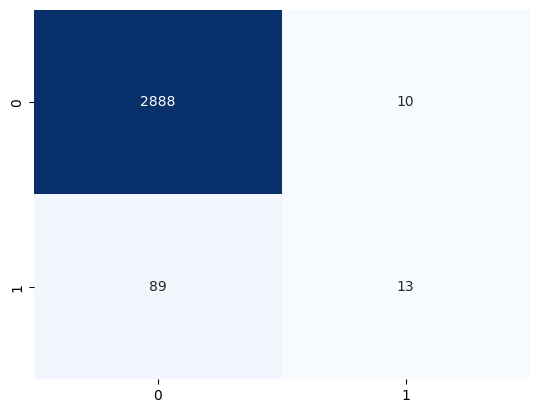

In [100]:
cm = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

Hyperparameter Tuning

In [101]:
param_grid = {
    'n_estimators': [50,100,200,500],
    'learning_rate': [0.01,0.1,0.5,1],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=3)]
}

In [102]:
ada_model = AdaBoostClassifier(random_state=42)

In [103]:
random_search = RandomizedSearchCV(
    estimator=ada_model,param_distributions=param_grid,
    n_iter=10,cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [104]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='f1_weighted')

In [105]:
best_params = random_search.best_params_
print("Best Hyperparameters :", best_params)

Best Hyperparameters : {'n_estimators': 100, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3)}


In [106]:
model_best = AdaBoostClassifier(**best_params,random_state=42)
model_best.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1, n_estimators=100, random_state=42)

In [107]:
y_pred_adaboost = model_best.predict(X_test)

In [108]:
print(classification_report(y_test,y_pred_adaboost, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2898
           1       0.76      0.52      0.62       102

    accuracy                           0.98      3000
   macro avg       0.87      0.76      0.80      3000
weighted avg       0.98      0.98      0.98      3000



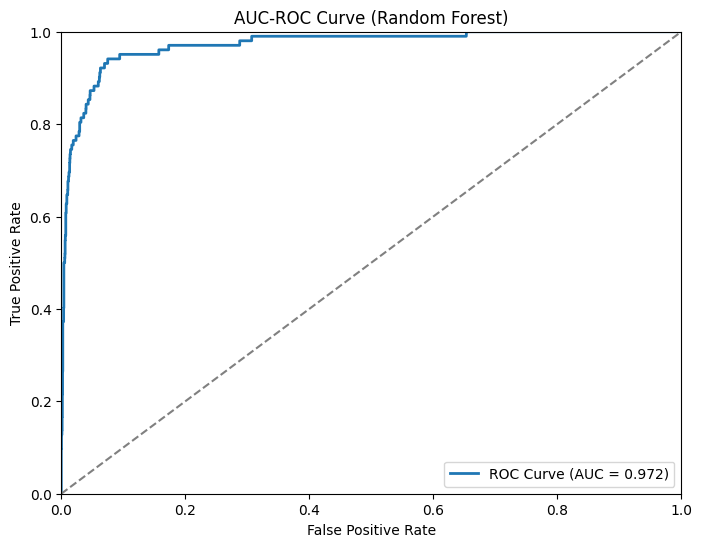

In [109]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = model_best.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [110]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [111]:
base_tree = DecisionTreeClassifier(max_depth=3, class_weight=class_weight_dict, random_state=42)

In [112]:
model = AdaBoostClassifier(estimator=base_tree, n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: np.float64(0.5175218098477007),
                                                                  1: np.float64(14.767932489451477)},
                                                    max_depth=3,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [113]:
y_pred = model.predict(X_test)

In [114]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2898
           1       0.24      0.92      0.38       102

    accuracy                           0.90      3000
   macro avg       0.62      0.91      0.66      3000
weighted avg       0.97      0.90      0.93      3000



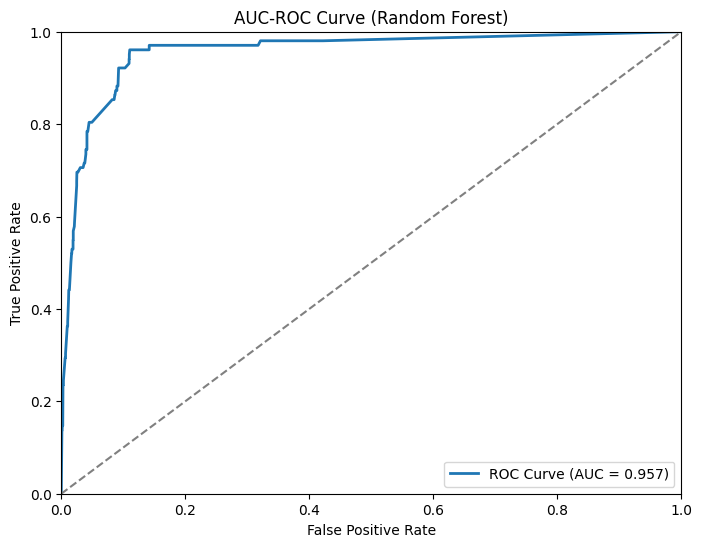

In [115]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

Using Different Base Learners SVC

In [116]:
from sklearn.svm import SVC

In [117]:
svc = SVC(probability=True, kernel='linear')

In [118]:
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [119]:
y_pred_svc = svc.predict(X_test)

In [120]:
print("Accuracy: ", accuracy_score(y_test,y_pred_svc))

Accuracy:  0.966


In [121]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2898
           1       0.24      0.92      0.38       102

    accuracy                           0.90      3000
   macro avg       0.62      0.91      0.66      3000
weighted avg       0.97      0.90      0.93      3000



In [122]:
metrics = evaluate_multiclass(y_test, y_pred_svc, y_probs)
print(metrics)

{'Accuracy': 0.966, 'Precision (Macro)': 0.483, 'Recall (Macro)': 0.5, 'F1 Score (Macro)': 0.491353001017294, 'ROC AUC Score': np.float64(0.9565504945939729)}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


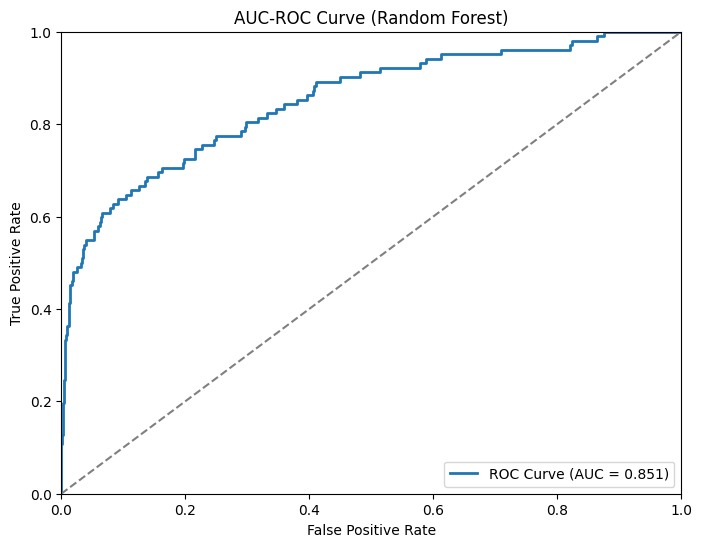

In [123]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = svc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

## SVC with AdaBoost

---



In [124]:
svc_adaBoost = AdaBoostClassifier(estimator=svc, n_estimators=10, learning_rate=1)

In [125]:
svc_adaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1, n_estimators=10)

In [126]:
y_pred_svc_adaboost = svc_adaBoost.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred_svc_adaboost, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2898
           1       0.00      0.00      0.00       102

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.97      0.95      3000



In [128]:
metrics = evaluate_multiclass(y_test, y_pred_svc_adaboost, y_probs)
print(metrics)

{'Accuracy': 0.966, 'Precision (Macro)': 0.483, 'Recall (Macro)': 0.5, 'F1 Score (Macro)': 0.491353001017294, 'ROC AUC Score': np.float64(0.8511617207269382)}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


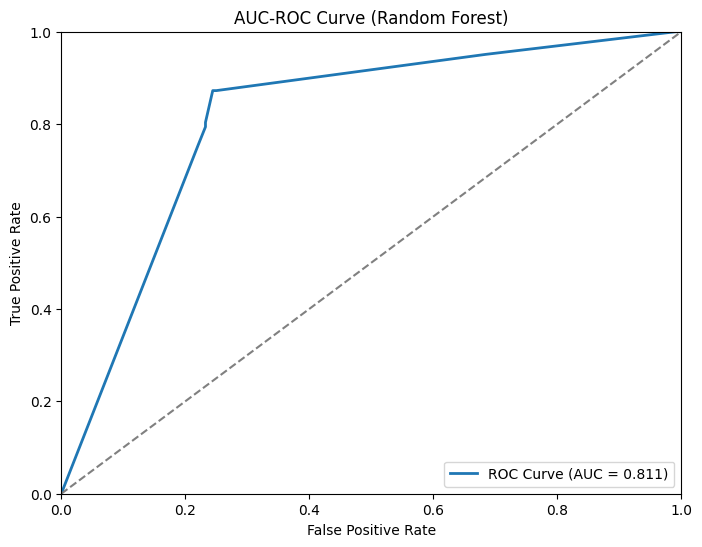

In [129]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = svc_adaBoost.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5, random_state=101)

In [132]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=10, random_state=101)

In [133]:
y_pred_gbc = gbc.predict(X_test)

In [134]:
print(classification_report(y_test, y_pred_gbc, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.84      0.30      0.45       102

    accuracy                           0.97      3000
   macro avg       0.91      0.65      0.72      3000
weighted avg       0.97      0.97      0.97      3000



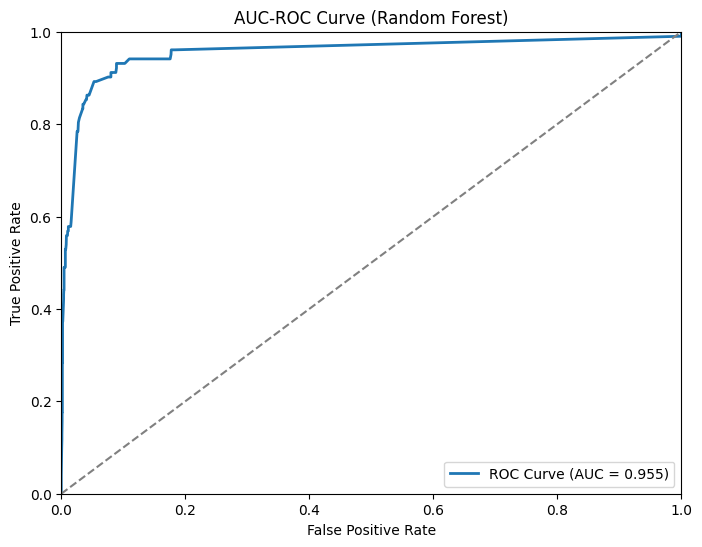

In [135]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = gbc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [136]:
metrics = evaluate_multiclass(y_test, y_pred_gbc, y_probs)
print(metrics)

{'Accuracy': 0.9743333333333334, 'Precision (Macro)': 0.9069378186826719, 'Recall (Macro)': 0.6509255876263549, 'F1 Score (Macro)': 0.7164527378268005, 'ROC AUC Score': np.float64(0.9552852541982978)}


<Axes: >

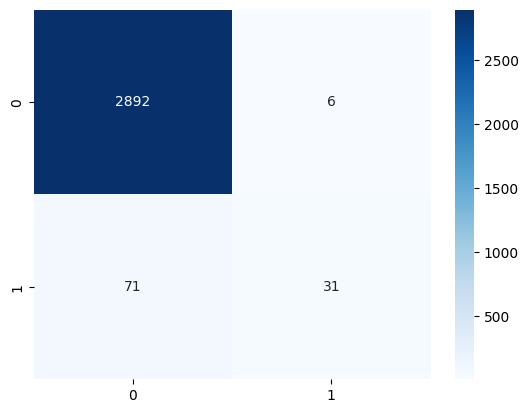

In [137]:
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

LightGBM

In [138]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [144]:
lgb_clf = lgb.LGBMClassifier(
    obective= 'multiclass',
    num_class= 1,

    boosting_type = 'gbdt',

    learning_rate = 0.1,
    max_dept = 3,
    n_estimators=100,


)

In [145]:
lgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective
[LightGBM] [Info] Number of positive: 237, number of negative: 6763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033857 -> initscore=-3.351162
[LightGBM] [Info] Start training from score -3.351162


LGBMClassifier(max_dept=3, num_class=1, obective='multiclass')

In [146]:
y_pred_lgb = lgb_clf.predict(X_test)

[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [147]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2898
           1       0.82      0.64      0.72       102

    accuracy                           0.98      3000
   macro avg       0.91      0.82      0.85      3000
weighted avg       0.98      0.98      0.98      3000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective


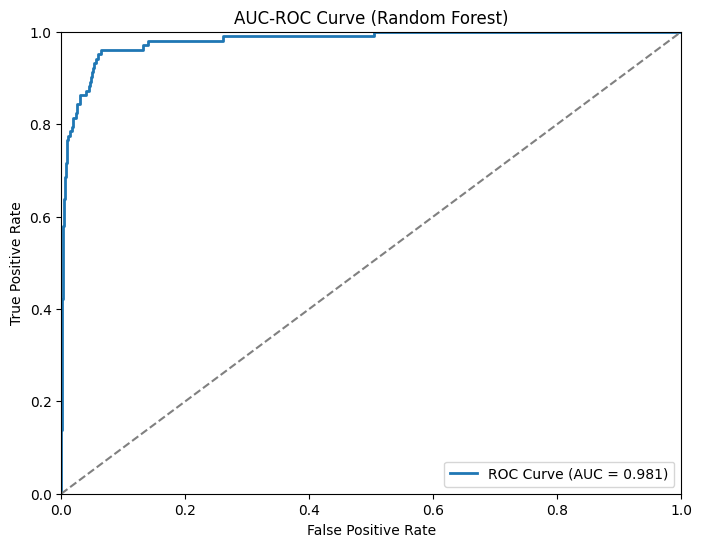

In [148]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = lgb_clf.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [149]:
metrics = evaluate_multiclass(y_test, y_pred_lgb, y_probs)
print(metrics)

{'Accuracy': 0.983, 'Precision (Macro)': 0.9050589576137875, 'Recall (Macro)': 0.8162119920431941, 'F1 Score (Macro)': 0.8547338258457957, 'ROC AUC Score': np.float64(0.9807981163479885)}


<Axes: >

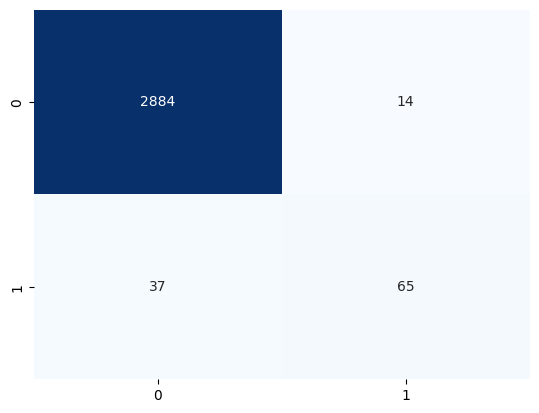

In [150]:
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

CatBoost

In [151]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [152]:
from catboost import CatBoostClassifier

In [153]:
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_seed=42
)

In [154]:
catboost_model.fit(X_train, y_train)

In [155]:
y_pred_cat = catboost_model.predict(X_test)

In [156]:
print(classification_report(y_test,y_pred_cat, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.81      0.38      0.52       102

    accuracy                           0.98      3000
   macro avg       0.90      0.69      0.75      3000
weighted avg       0.97      0.98      0.97      3000



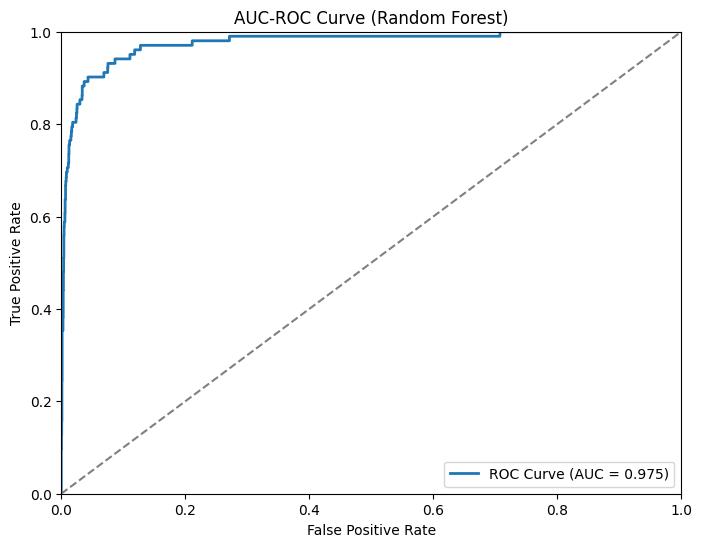

In [157]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = catboost_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [158]:
metrics = evaluate_multiclass(y_test, y_pred_cat, y_probs)
print(metrics)

{'Accuracy': 0.976, 'Precision (Macro)': 0.8955792682926829, 'Recall (Macro)': 0.6896236755571794, 'F1 Score (Macro)': 0.7538461538461538, 'ROC AUC Score': np.float64(0.9754749725977346)}


<Axes: >

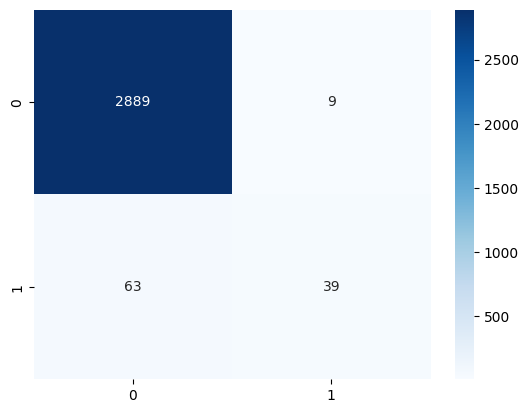

In [159]:
cm = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Stacking

---



In [160]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [161]:
base_models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

In [162]:
meta_model = LogisticRegression(random_state=42)

In [163]:
n_splits = 5

In [164]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [165]:
meta_features = np.zeros((X_train.shape[0], len(base_models)))

In [166]:
y_train = np.array(y_train)

Train base models using cross-validation and generate meta features

In [167]:
meta_features = np.zeros((X_train.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models):
    meta_feature_fold = np.zeros((X_train.shape[0],))
    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_fold_train, X_fold_valid = X_train[train_idx], X_train[valid_idx]
        y_fold_train, y_fold_valid = y_train[train_idx], y_train[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        meta_feature_fold[valid_idx] = model.predict(X_fold_valid)

    meta_features[:, i] = meta_feature_fold

In [168]:
meta_model.fit(meta_features, y_train)

LogisticRegression(random_state=42)

In [169]:
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

In [170]:
for i, (name, model) in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_test[:, i] = model.predict(X_test)

In [171]:
y_pred_stack = meta_model.predict(meta_features_test)

In [172]:
print(classification_report(y_test, y_pred_stack, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.85      0.55      0.67       102

    accuracy                           0.98      3000
   macro avg       0.92      0.77      0.83      3000
weighted avg       0.98      0.98      0.98      3000



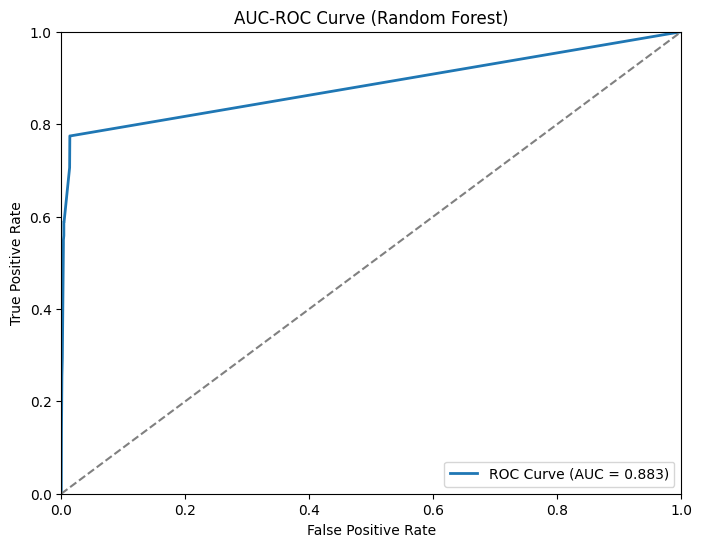

In [173]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = meta_model.predict_proba(meta_features_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [174]:
metrics = evaluate_multiclass(y_test, y_pred_stack, y_probs)
print(metrics)

{'Accuracy': 0.9813333333333333, 'Precision (Macro)': 0.9164032967713949, 'Recall (Macro)': 0.7727844761092844, 'F1 Score (Macro)': 0.8285322359396433, 'ROC AUC Score': np.float64(0.8826049743568924)}


<Axes: >

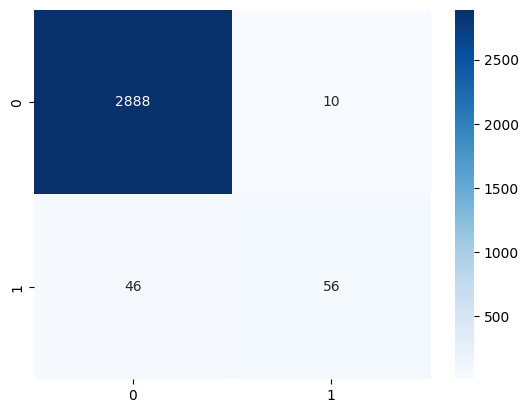

In [175]:
cm = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Voting

---



In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [177]:
log_clf = LogisticRegression(random_state=42)
svc_clf = SVC(probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)

In [178]:
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_clf),
        ('svc', svc_clf),
        ('dt', dt_clf),
        ('knn', knn_clf),
        ('rf', rf_clf)
    ],
    voting='soft'
)

In [179]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [180]:
for clf_name, clf in voting_clf.named_estimators_.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"{clf_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

log_reg Accuracy: 0.97
svc Accuracy: 0.97
dt Accuracy: 0.98
knn Accuracy: 0.97
rf Accuracy: 0.98


In [181]:
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test,y_pred_voting):.2f}")

Voting Classifier Accuracy: 0.98


In [182]:
print(classification_report(y_test,y_pred_voting,zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.88      0.41      0.56       102

    accuracy                           0.98      3000
   macro avg       0.93      0.70      0.77      3000
weighted avg       0.98      0.98      0.97      3000



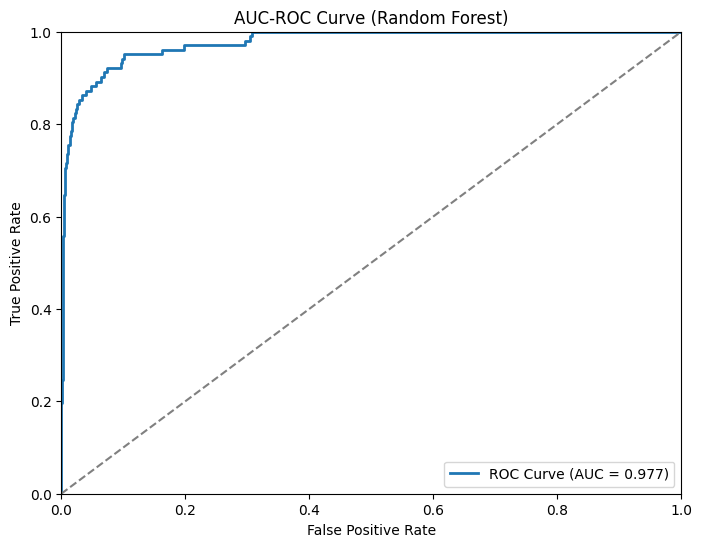

In [183]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = voting_clf.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [184]:
metrics = evaluate_multiclass(y_test, y_pred_voting, y_probs)
print(metrics)

{'Accuracy': 0.978, 'Precision (Macro)': 0.9273373983739837, 'Recall (Macro)': 0.7048471562538059, 'F1 Score (Macro)': 0.7743589743589744, 'ROC AUC Score': np.float64(0.9769009052896521)}


<Axes: >

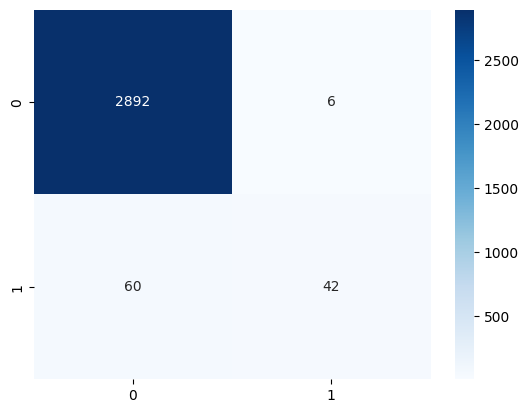

In [185]:
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Blending

---




In [186]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [187]:
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
svm = SVC(probability=True, class_weight="balanced", random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)

In [188]:
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [189]:
rf_train_pred = rf.predict_proba(X_train)
svm_train_pred = svm.predict_proba(X_train)
knn_train_pred = knn.predict_proba(X_train)

In [190]:
meta_X_train = np.hstack((rf_train_pred, svm_train_pred, knn_train_pred))

In [191]:
meta_model_blending = LGBMClassifier(n_estimators=100, random_state=42)

In [192]:
meta_model_blending.fit(meta_X_train, y_train)

[LightGBM] [Info] Number of positive: 237, number of negative: 6763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033857 -> initscore=-3.351162
[LightGBM] [Info] Start training from score -3.351162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(random_state=42)

In [193]:
rf_test_pred = rf.predict_proba(X_test)
svm_test_pred = svm.predict_proba(X_test)
knn_test_pred = knn.predict_proba(X_test)

In [194]:
meta_X_test = np.hstack((rf_test_pred, svm_test_pred, knn_test_pred))

In [195]:
final_pred_blend = meta_model_blending.predict(meta_X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [196]:
print(classification_report(y_test, final_pred_blend))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.85      0.54      0.66       102

    accuracy                           0.98      3000
   macro avg       0.92      0.77      0.82      3000
weighted avg       0.98      0.98      0.98      3000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


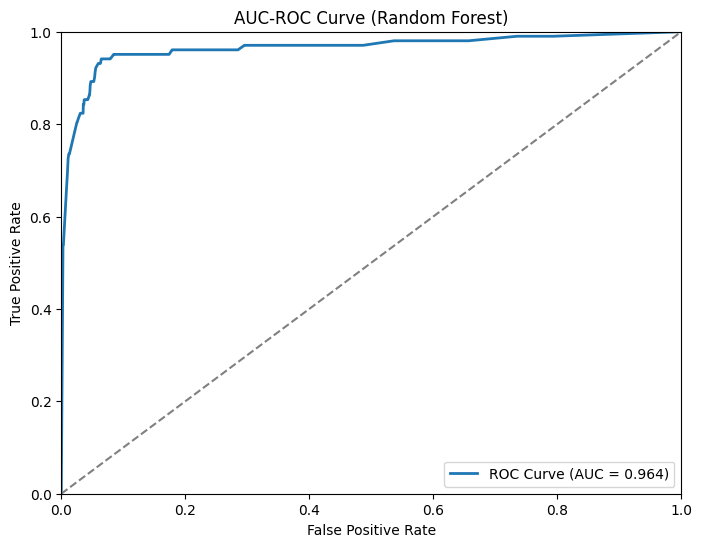

In [198]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = meta_model_blending.predict_proba(meta_X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [199]:
metrics = evaluate_multiclass(y_test, final_pred_blend, y_probs)
print(metrics)

{'Accuracy': 0.981, 'Precision (Macro)': 0.915070108766872, 'Recall (Macro)': 0.7678825153249705, 'F1 Score (Macro)': 0.8244553238799275, 'ROC AUC Score': np.float64(0.9642789482942936)}


<Axes: >

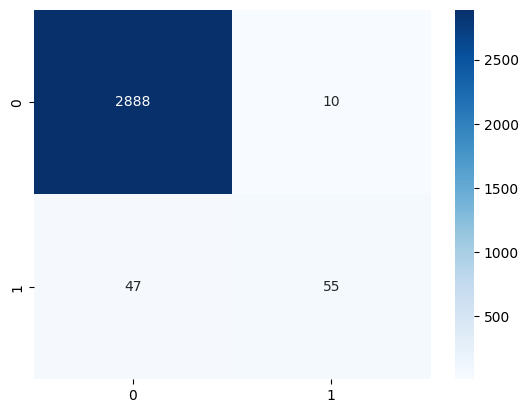

In [200]:
cm = confusion_matrix(y_test, final_pred_blend)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

### **XGB Classifier**

In [201]:
from xgboost import XGBClassifier

In [202]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))

In [203]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [204]:
xgb_pred = xgb.predict(X_test)

In [205]:
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.68      0.75      0.72       102

    accuracy                           0.98      3000
   macro avg       0.84      0.87      0.85      3000
weighted avg       0.98      0.98      0.98      3000



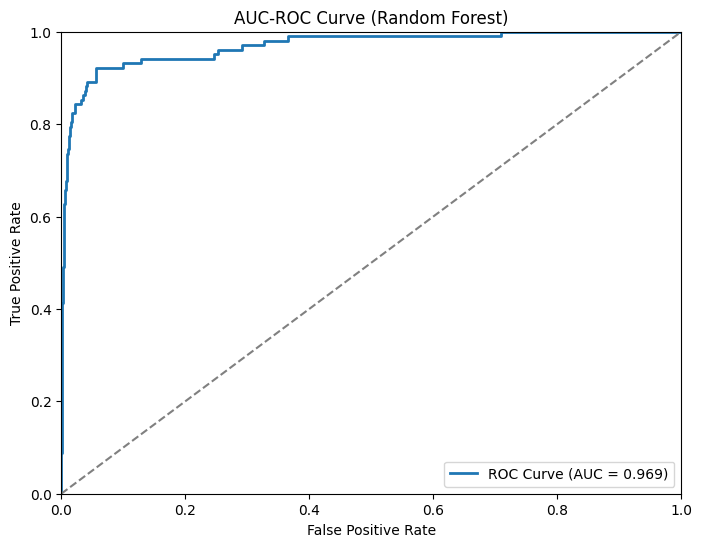

In [206]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = xgb.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

<Axes: >

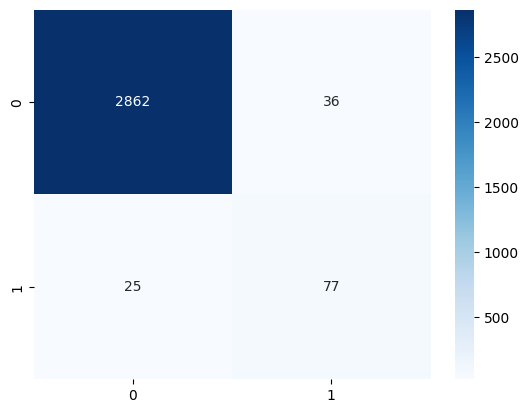

In [207]:
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [208]:
metrics = evaluate_multiclass(y_test, xgb_pred, y_probs)
print(metrics)

{'Accuracy': 0.9796666666666667, 'Precision (Macro)': 0.8363782105318011, 'Recall (Macro)': 0.8712398002679332, 'F1 Score (Macro)': 0.8528672790496673, 'ROC AUC Score': np.float64(0.9690895681944275)}


### **Neural Network (ANN)**

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

In [210]:

X_train.shape

(7000, 5)

In [211]:
Early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [212]:
model = Sequential()

In [213]:
model.add(Input(shape=(5, )))

In [214]:
model.add(Dense(29, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

In [215]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [216]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=600, callbacks=[Early_stop])

Epoch 1/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4729 - loss: 1.0232 - val_accuracy: 0.9637 - val_loss: 0.5457
Epoch 2/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5843 - loss: 0.7621 - val_accuracy: 0.9660 - val_loss: 0.4629
Epoch 3/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6974 - loss: 0.6184 - val_accuracy: 0.9660 - val_loss: 0.3878
Epoch 4/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8165 - loss: 0.5026 - val_accuracy: 0.9660 - val_loss: 0.3270
Epoch 5/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8674 - loss: 0.4163 - val_accuracy: 0.9660 - val_loss: 0.2821
Epoch 6/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9006 - loss: 0.3654 - val_accuracy: 0.9660 - val_loss: 0.2445
Epoch 7/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9229 - loss: 0.3201 - val_accuracy: 0.9660 - val_loss: 0.2124
Epoch 8/600
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9356 - loss: 0.2876 - val_accuracy: 0.9660 - 

In [217]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

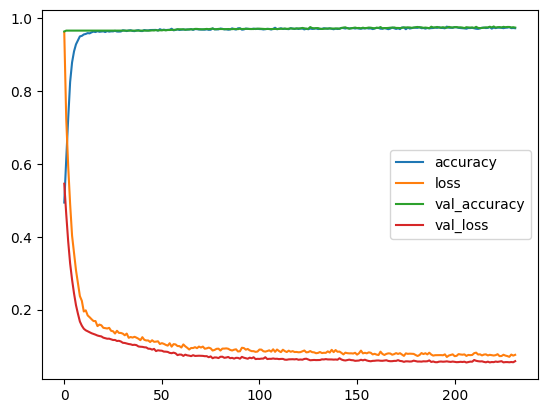

In [218]:
model_loss.plot()

In [219]:
predict = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [220]:
predict[0]

array([0.9808739, 0.0299904], dtype=float32)

In [221]:
np.argmax(predict[0])

np.int64(0)

In [222]:
predict_label = [np.argmax(i) for i in predict]

In [223]:
print(classification_report(y_test, predict_label))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.88      0.28      0.43       102

    accuracy                           0.97      3000
   macro avg       0.93      0.64      0.71      3000
weighted avg       0.97      0.97      0.97      3000

